# File Description:

#### File Format: CSV
#### Columns: This dataset includes columns such as order_id, date, item_name, item_type, item_price, quantity, transaction_amount, transaction_type, received_by, and time_of_sale.
#### Data Size: This file contains 1000 rows and 10 columns.
#### Data Structure: The dataset is organized as a single CSV file, providing information on transactions at a local restaurant.
#### Data Cleaning and Preprocessing: The data has been carefully reviewed and cleaned to address duplicates and missing values, ensuring data quality for analysis.
#### Date of Last Update: The dataset was last updated on March 31, 2023.
#### Special Notes: Please note that the 'transaction_amount' column represents the total transaction amount, derived from the multiplication of 'item_price' and 'quantity' for each item in the order.
#### Data Source: This data was collected from a local restaurant situated near my home and is made available for analysis and educational purposes.

## Data Description:
This dataset captures sales transactions from a local restaurant near my home. It includes details such as the order ID, date of the transaction, item names (representing various food and beverage items), item types (categorized as Fast-food or Beverages), item prices, quantities ordered, transaction amounts, transaction types (cash, online, or others), the gender of the staff member who received the order, and the time of the sale (Morning, Evening, Afternoon, Night, Midnight). The dataset offers a valuable snapshot of the restaurant's daily operations and customer behavior.

### Columns:

    order_id: a unique identifier for each order.
    date: date of the transaction.
    item_name: name of the food.
    item_type: category of item (Fastfood or Beverages).
    item_price: price of the item for 1 quantity.
    Quantity: how much quantity the customer orders.
    transaction_amount: the total amount paid by customers.
    transaction_type: payment method (cash, online, others).
    received_by: gender of the person handling the transaction.
    time_of_sale: different times of the day (Morning, Evening, Afternoon, Night, Midnight).

### Exploratory Data Analysis

### Steps for EDA¶

#### 1. Import LIBS and read the data¶

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv("Balaji Fast Food Sales.csv")
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


#### 2. Understand the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [4]:
df.shape

(1000, 10)

In [5]:
print('No.of rows:', df.shape[0])
print('No.of columns:', df.shape[1])

No.of rows: 1000
No.of columns: 10


In [6]:
df.size

10000

In [7]:
print('No. of values',df.size)

No. of values 10000


### 3. Check for duplicate roes

In [8]:
df[df.duplicated()]

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale


### 4.Check all data types of the column and change if any anomalies

In [9]:
col= df.columns.to_list()
col

['order_id',
 'date',
 'item_name',
 'item_type',
 'item_price',
 'quantity',
 'transaction_amount',
 'transaction_type',
 'received_by',
 'time_of_sale']

In [10]:
for i in col:
    print(i)
    print(df[i].unique())
    print()
    print('*****')

order_id
[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  195  1

##### Changing the anomalies

In [11]:
df['date']=df['date'].str.replace('-','/')
df['date']

0      07/03/2022
1       8/23/2022
2      11/20/2022
3      02/03/2023
4      10/02/2022
          ...    
995     3/19/2023
996     9/20/2022
997     1/26/2023
998     8/27/2022
999     5/29/2022
Name: date, Length: 1000, dtype: object

In [12]:
df['date']=pd.to_datetime(df['date'])

In [13]:
df['date']

0     2022-07-03
1     2022-08-23
2     2022-11-20
3     2023-02-03
4     2022-10-02
         ...    
995   2023-03-19
996   2022-09-20
997   2023-01-26
998   2022-08-27
999   2022-05-29
Name: date, Length: 1000, dtype: datetime64[ns]

#### 5. Seperate numeric and categorical column

In [14]:
num= df.select_dtypes(include=np.number).columns.to_list()
print('Numeric columns:',num)

Numeric columns: ['order_id', 'item_price', 'quantity', 'transaction_amount']


In [15]:
Cat=df.select_dtypes(exclude=np.number).columns.to_list()
print('Categoric columns:',Cat)

Categoric columns: ['date', 'item_name', 'item_type', 'transaction_type', 'received_by', 'time_of_sale']


#### 6. Statistical Analysis

##### Num variables:


In [16]:
for i in num:
    print(f'Mean value of column{i} is', df[i].mean())
    print('*****')

Mean value of columnorder_id is 500.5
*****
Mean value of columnitem_price is 33.315
*****
Mean value of columnquantity is 8.162
*****
Mean value of columntransaction_amount is 275.23
*****


In [17]:
for i in num:
    print(f'median value of column{i} is', df[i].median())
    print('*****')

median value of columnorder_id is 500.5
*****
median value of columnitem_price is 25.0
*****
median value of columnquantity is 8.0
*****
median value of columntransaction_amount is 240.0
*****


In [18]:
for i in num:
    print(f'mode value of column{i} is', df[i].mode())
    print('*****')

mode value of columnorder_id is 0         1
1         2
2         3
3         4
4         5
       ... 
995     996
996     997
997     998
998     999
999    1000
Name: order_id, Length: 1000, dtype: int64
*****
mode value of columnitem_price is 0    20
Name: item_price, dtype: int64
*****
mode value of columnquantity is 0    13
Name: quantity, dtype: int64
*****
mode value of columntransaction_amount is 0    300
Name: transaction_amount, dtype: int64
*****


In [19]:
for i in num:
    print(f'range value of column{i} is', df[i].max()-df[i].min())
    print('*****')

range value of columnorder_id is 999
*****
range value of columnitem_price is 40
*****
range value of columnquantity is 14
*****
range value of columntransaction_amount is 880
*****


In [20]:
for i in num:
    print(f'variance value of column{i} is', df[i].var())
    print('*****')

variance value of columnorder_id is 83416.66666666667
*****
variance value of columnitem_price is 222.65843343343138
*****
variance value of columnquantity is 19.475231231231273
*****
variance value of columntransaction_amount is 41780.57767767783
*****


In [21]:
for i in num:
    print(f'standard deviation value of column{i} is', df[i].std())
    print('*****')

standard deviation value of columnorder_id is 288.8194360957494
*****
standard deviation value of columnitem_price is 14.921743645882387
*****
standard deviation value of columnquantity is 4.413075031226104
*****
standard deviation value of columntransaction_amount is 204.4029786418922
*****


In [22]:
for i in num:
    print(f'IQR value of column{i} is', df[i].quantile(0.75)-df[i].quantile(0.25))
    print('*****')

IQR value of columnorder_id is 499.5
*****
IQR value of columnitem_price is 30.0
*****
IQR value of columnquantity is 8.0
*****
IQR value of columntransaction_amount is 240.0
*****


In [23]:
for i in num:
    print(f'sweness value of column{i} is', df[i].skew())
    print('*****')

sweness value of columnorder_id is 0.0
*****
sweness value of columnitem_price is 0.6250044803515558
*****
sweness value of columnquantity is -0.05129947454908782
*****
sweness value of columntransaction_amount is 1.052643178230624
*****


In [24]:
for i in num:
    print(f'kurtosis value of column{i} is', df[i].kurt())
    print('*****')

kurtosis value of columnorder_id is -1.2
*****
kurtosis value of columnitem_price is -1.173262217524134
*****
kurtosis value of columnquantity is -1.2416861155903576
*****
kurtosis value of columntransaction_amount is 0.6554065709917558
*****


#### Categorical variable:

In [25]:
for i in Cat:
    print(f'mode value of column{i} is', df[i].mode())
    print('*****')

mode value of columndate is 0   2022-05-09
1   2022-08-31
2   2022-10-11
Name: date, dtype: datetime64[ns]
*****
mode value of columnitem_name is 0    Cold coffee
Name: item_name, dtype: object
*****
mode value of columnitem_type is 0    Fastfood
Name: item_type, dtype: object
*****
mode value of columntransaction_type is 0    Cash
Name: transaction_type, dtype: object
*****
mode value of columnreceived_by is 0    Mr.
Name: received_by, dtype: object
*****
mode value of columntime_of_sale is 0    Afternoon
1        Night
Name: time_of_sale, dtype: object
*****


In [26]:
for i in Cat:
    print(df[i].value_counts(normalize=True)*100)
    print()

date
2022-10-11    0.8
2022-05-09    0.8
2022-08-31    0.8
2023-03-19    0.7
2023-02-03    0.7
             ... 
2022-06-12    0.1
2022-04-15    0.1
2022-05-17    0.1
2022-07-23    0.1
2022-06-14    0.1
Name: proportion, Length: 348, dtype: float64

item_name
Cold coffee        16.1
Sugarcane juice    15.3
Panipuri           15.0
Frankie            13.9
Aalopuri           13.4
Vadapav            13.4
Sandwich           12.9
Name: proportion, dtype: float64

item_type
Fastfood     68.6
Beverages    31.4
Name: proportion, dtype: float64

transaction_type
Cash      53.303471
Online    46.696529
Name: proportion, dtype: float64

received_by
Mr.     51.2
Mrs.    48.8
Name: proportion, dtype: float64

time_of_sale
Night        20.5
Afternoon    20.5
Evening      20.1
Midnight     19.9
Morning      19.0
Name: proportion, dtype: float64



Covariance

In [27]:
df[num].cov()

,order_id,item_price,quantity,transaction_amount
order_id,83416.666667,159.577077,13.185185,2595.785786
item_price,159.577077,222.658433,3.316286,1943.606156
quantity,13.185185,3.316286,19.475231,660.122863
transaction_amount,2595.785786,1943.606156,660.122863,41780.577678


INFERENCES
* item_price and quantity has some positive realtion which is 3.31
* item_price and transaction_amount amount has positive relation.
* transaction_amount and quantity also has positive relation and so on.	

Corelation

In [28]:
df[num].corr()

,order_id,item_price,quantity,transaction_amount
order_id,1.000000,0.037028,0.010345,0.043970
item_price,0.037028,1.000000,0.050361,0.637238
quantity,0.010345,0.050361,1.000000,0.731806
transaction_amount,0.043970,0.637238,0.731806,1.000000


INFERENCES
* quantity and transaction_amount is highly positively related
* item_price and transaction_amount is hifhly positively realted ans so on.

In [29]:
for i in num:
    print(f'coeff of variation of column{i} is', (df[i].std()/df[i].mean())*100)
    print('*****')

coeff of variation of columnorder_id is 57.70618103811176
*****
coeff of variation of columnitem_price is 44.789865363597144
*****
coeff of variation of columnquantity is 54.06854975773221
*****
coeff of variation of columntransaction_amount is 74.26624228532216
*****


Inferences
* For item price level of deviation is moderate
* For quatinty level of deviation is moderate
* for transaction amount level of devaiation is high and so on

# Data Visualization

## 1. univariate visulization

#### Num columns:

In [30]:
num

['order_id', 'item_price', 'quantity', 'transaction_amount']

#### 1. Histplot- to get the frequency bars or density bars

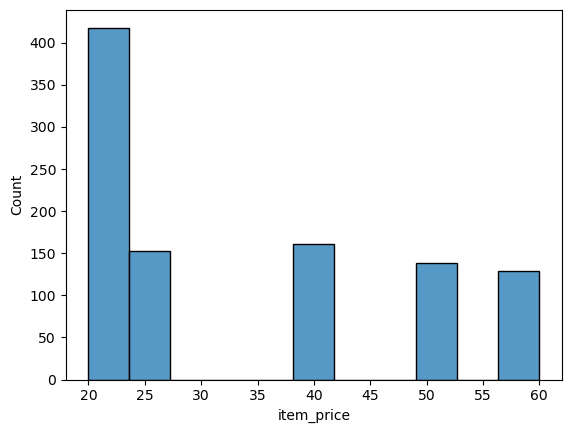

In [31]:
sns.histplot(df['item_price'])
plt.show()

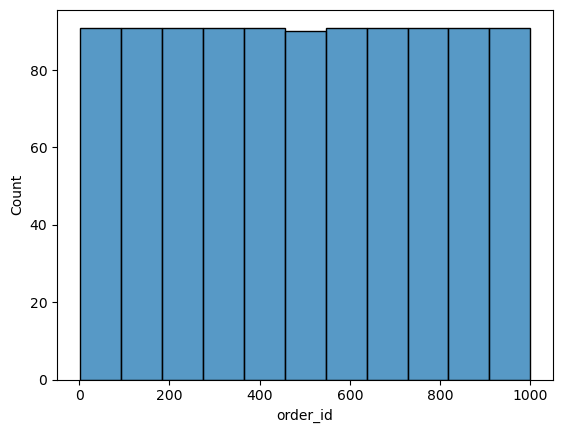

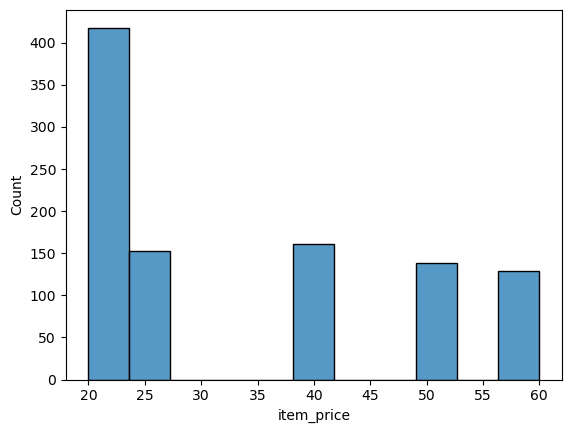

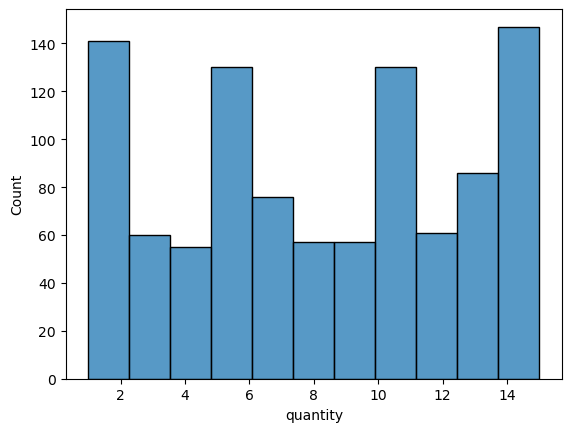

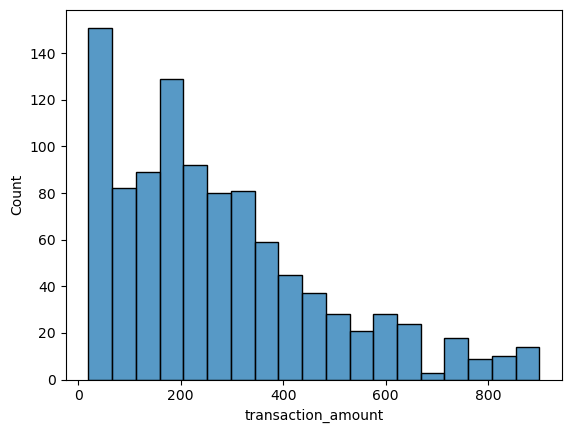

In [32]:
for i in num:
    sns.histplot(df[i])
    plt.show()

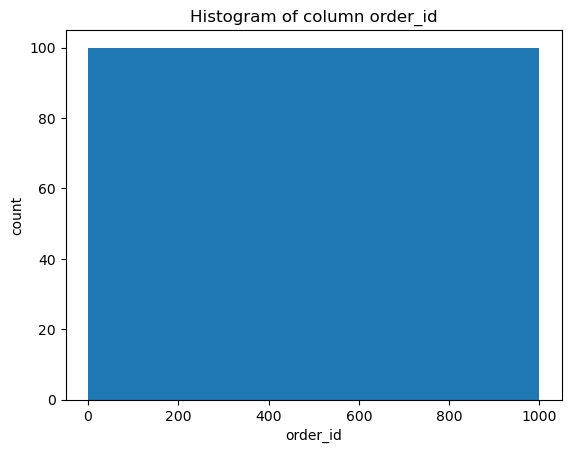

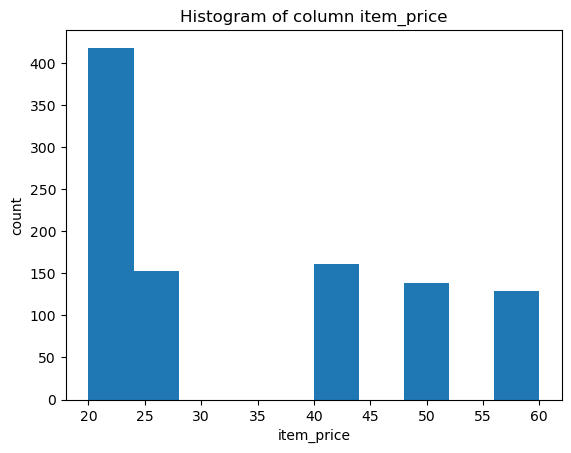

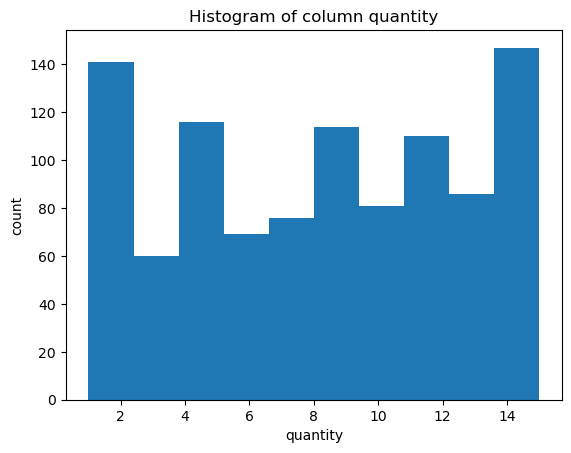

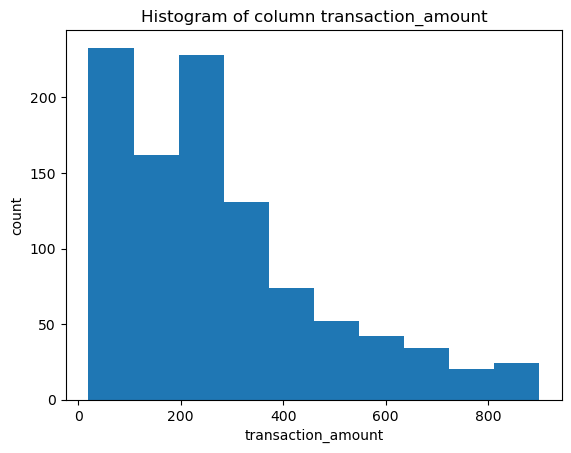

In [33]:
for i in num:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.ylabel('count')
    plt.title(f'Histogram of column {i}')
    plt.show()

#### To create grid (to display all charts together)

In [34]:
plt.rcParams['figure.figsize']=[15,8]    # to change the size of chart

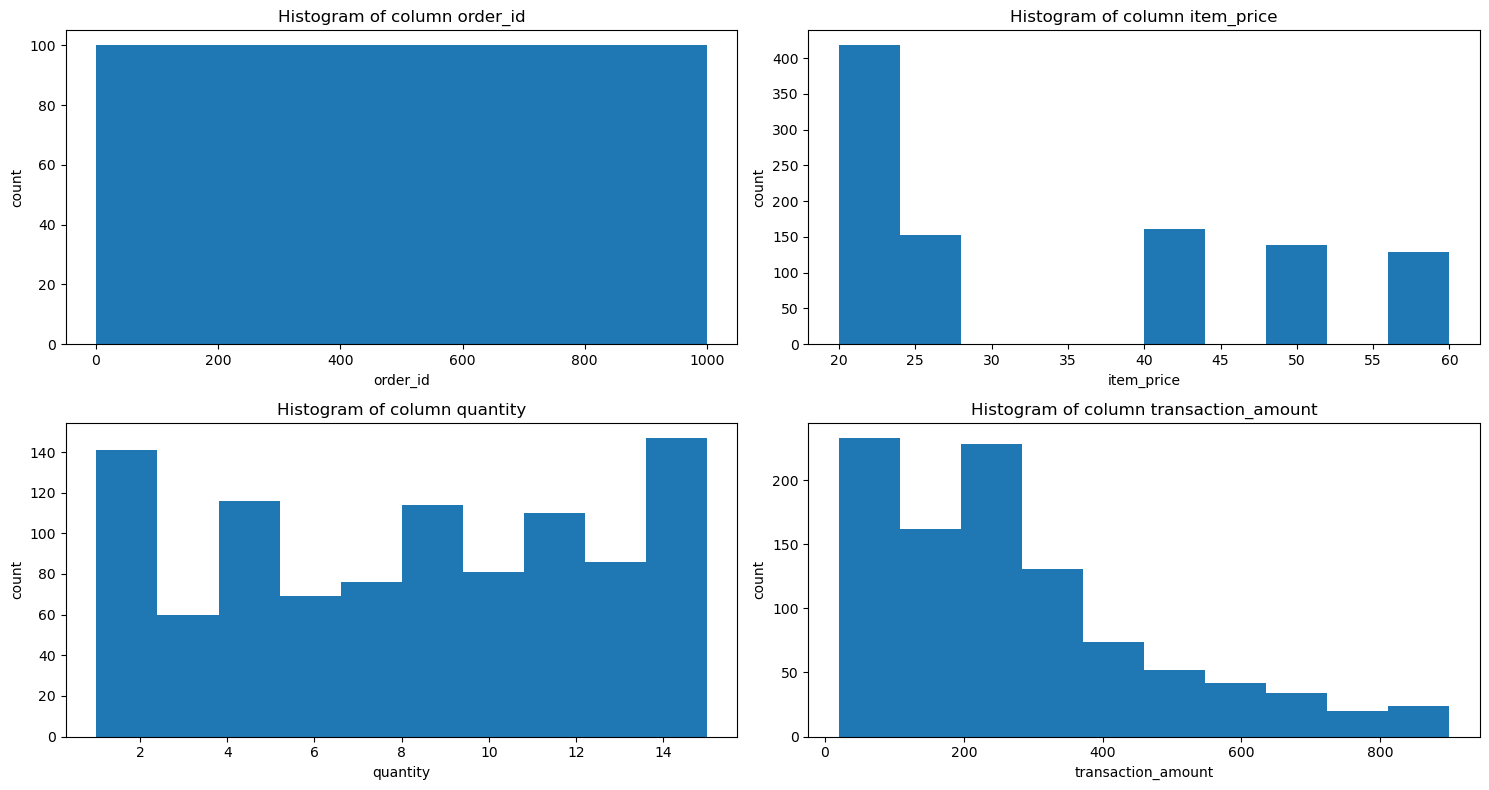

In [35]:
#  using matplotlib(plt)

t=1
for i in num:
    plt.subplot(2,2,t)    # here 2,2 is because we have 4 numercal variable so, odd numbers wont work to create grid
    plt.hist(df[i])                
    plt.xlabel(i)
    plt.ylabel('count')
    plt.title(f'Histogram of column {i}')
    t+=1
plt.tight_layout()
plt.show()

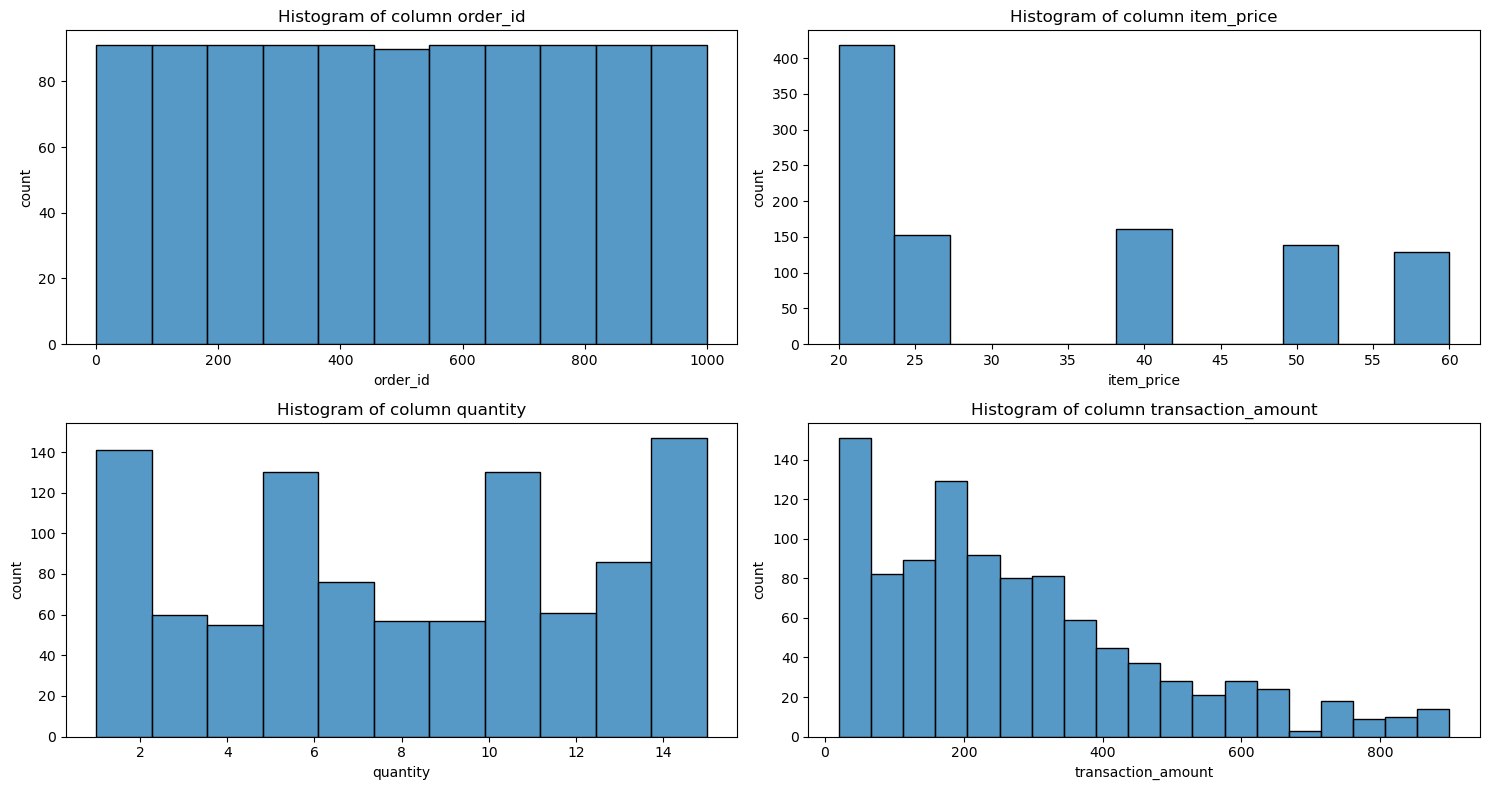

In [36]:
#  using seaborn(sns)

t=1
for i in num:
    plt.subplot(2,2,t)    # here 2,2 is because we have 4 numercal variable so, odd numbers wont work to create grid
    sns.histplot(df[i])                
    plt.xlabel(i)
    plt.ylabel('count')
    plt.title(f'Histogram of column {i}')
    t+=1
plt.tight_layout()
plt.show()

inferences

* more count of products are between the price range of 20 to 23
* There may not be products between price range of 27 to 37

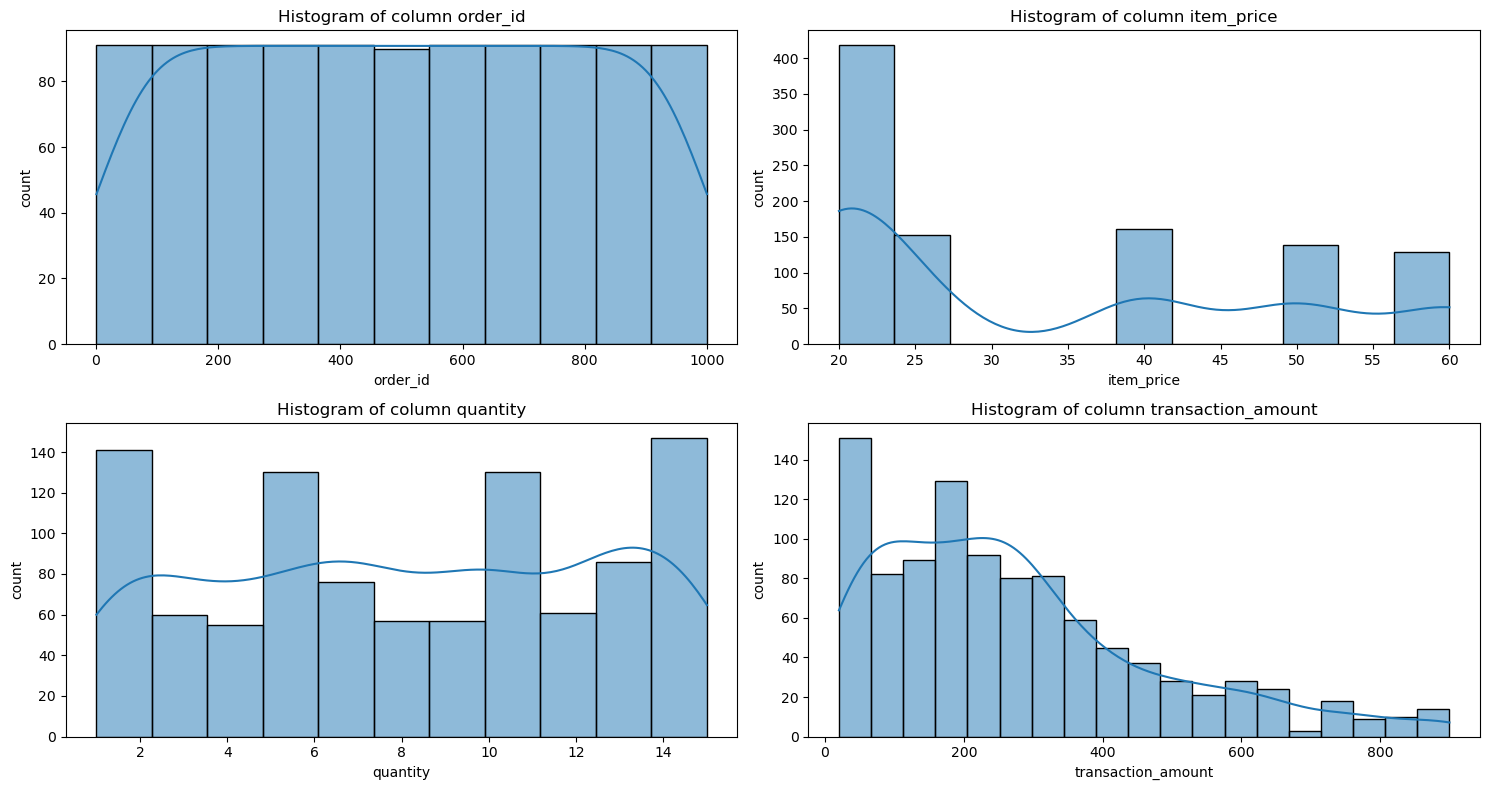

In [37]:
# to get frequency distribution from histplot itself (without boxplot), give kde=True
t=1
for i in num:
    plt.subplot(2,2,t)    # here 2,2 is because we have 4 numercal variable so, odd numbers wont work to create grid
    sns.histplot(df[i],kde=True)                
    plt.xlabel(i)
    plt.ylabel('count')
    plt.title(f'Histogram of column {i}')
    t+=1
plt.tight_layout()
plt.show()

#### Dist plot (density or frequency distribution ) only in sns

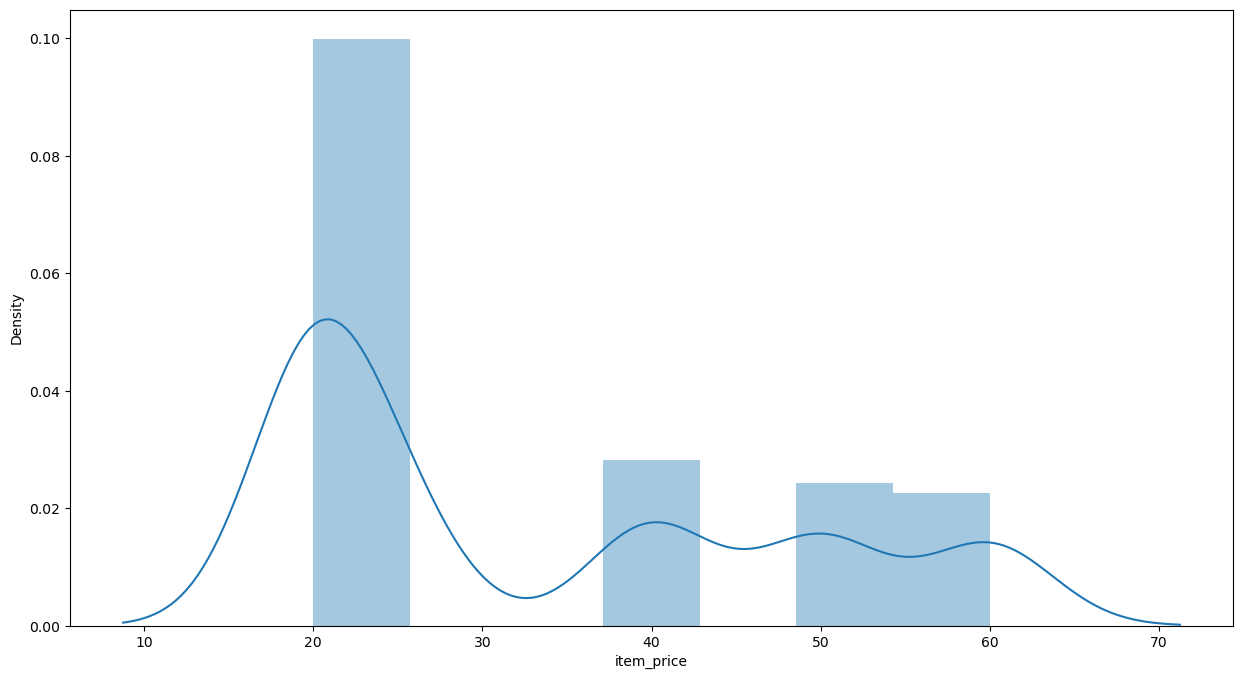

In [38]:
sns.distplot(df['item_price'])
plt.show()

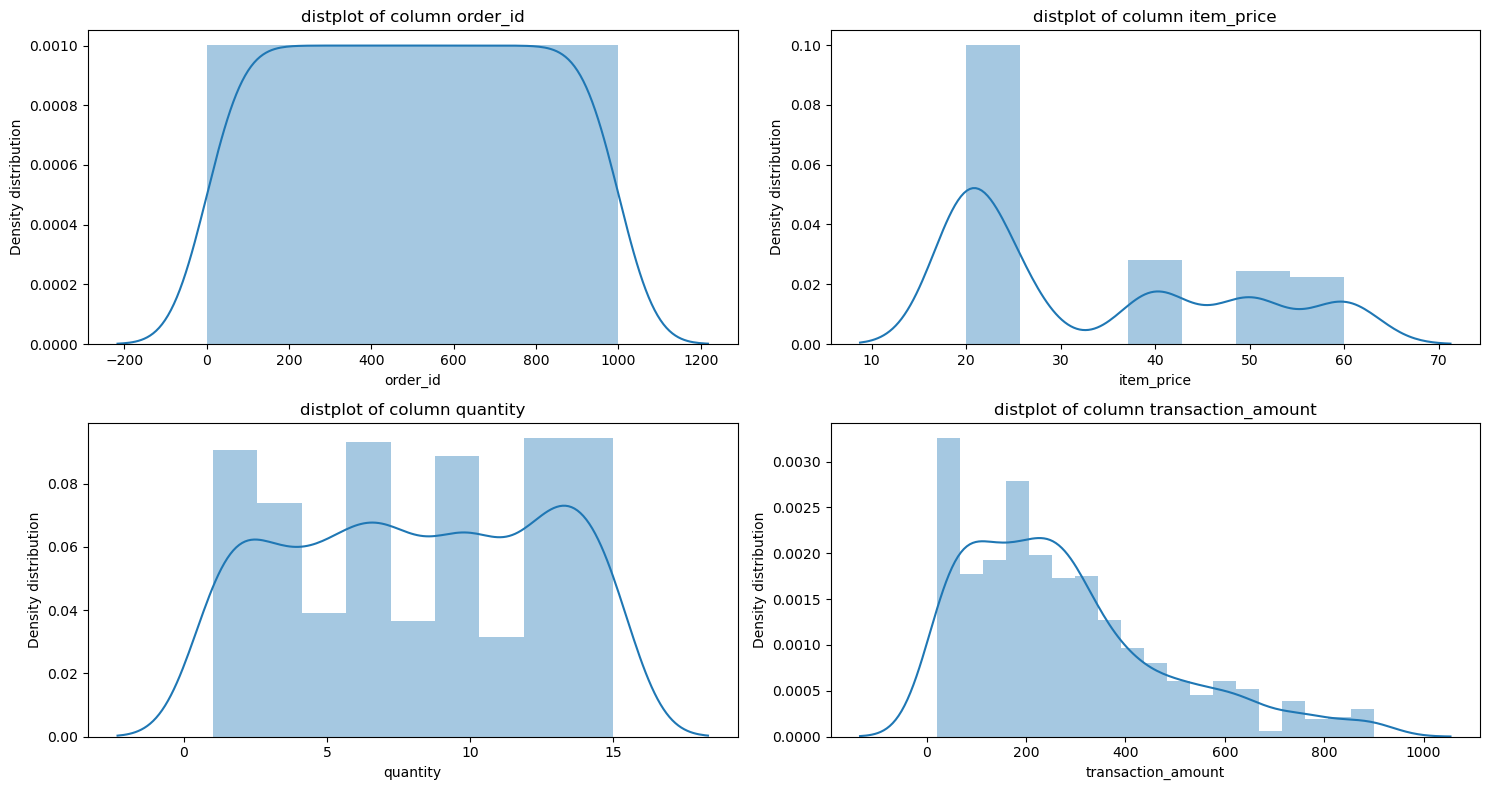

In [39]:
# to create grid

t=1
for i in num:
    plt.subplot(2,2,t)    # here 2,2 is because we have 4 numercal variable so, odd numbers wont work to create grid
    sns.distplot(df[i])                
    plt.xlabel(i)
    plt.ylabel('Density distribution')
    plt.title(f'distplot of column {i}')
    t+=1
plt.tight_layout()
plt.show()

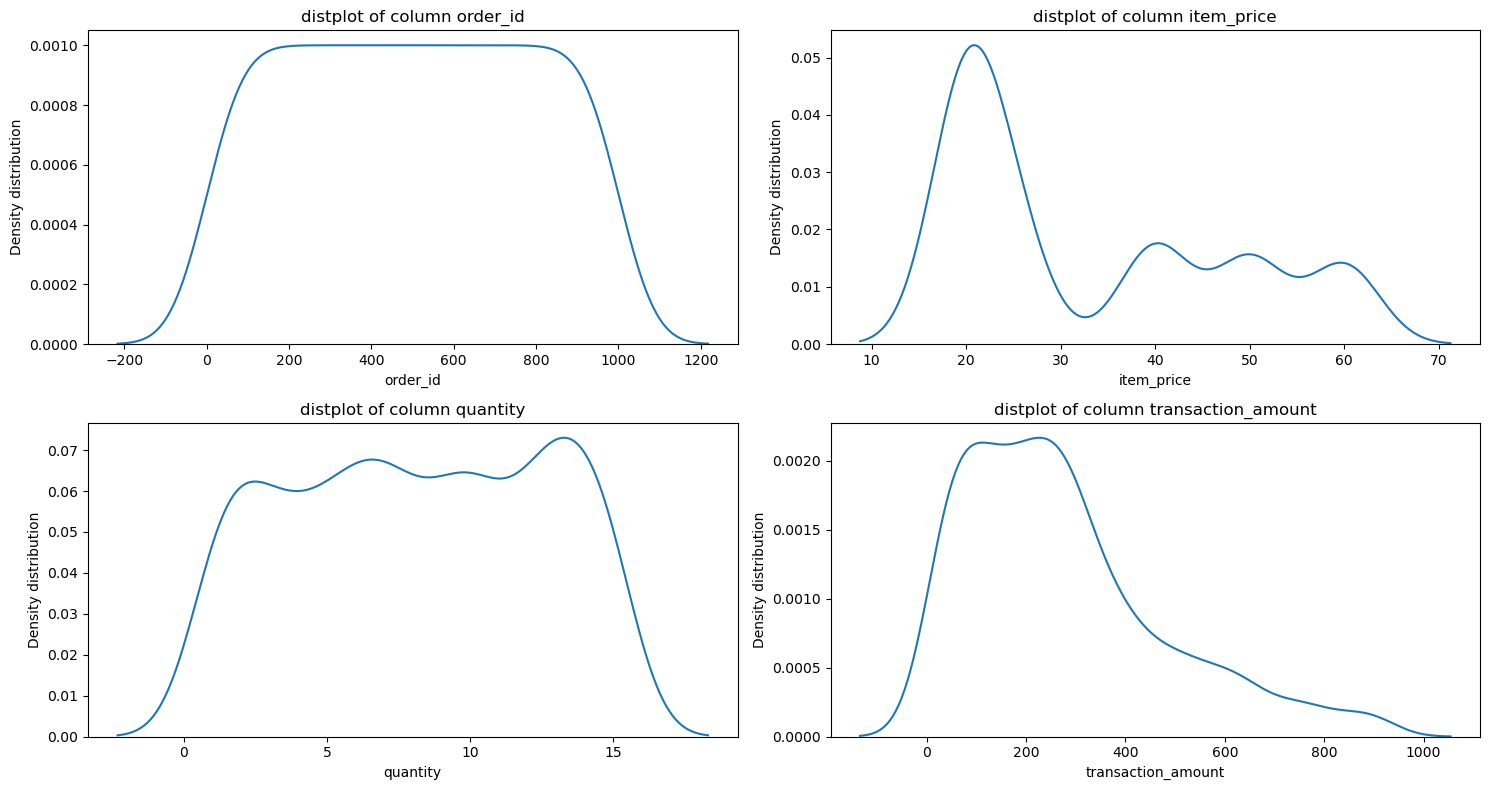

In [40]:

t=1
for i in num:
    plt.subplot(2,2,t)   
    sns.distplot(df[i],hist=False)    # to not see the graph only distribution line            
    plt.xlabel(i)
    plt.ylabel('Density distribution')
    plt.title(f'distplot of column {i}')
    t+=1
plt.tight_layout()
plt.show()

Inferences

* item price and transcation amount is slighly positively right skewed

#### Box plot

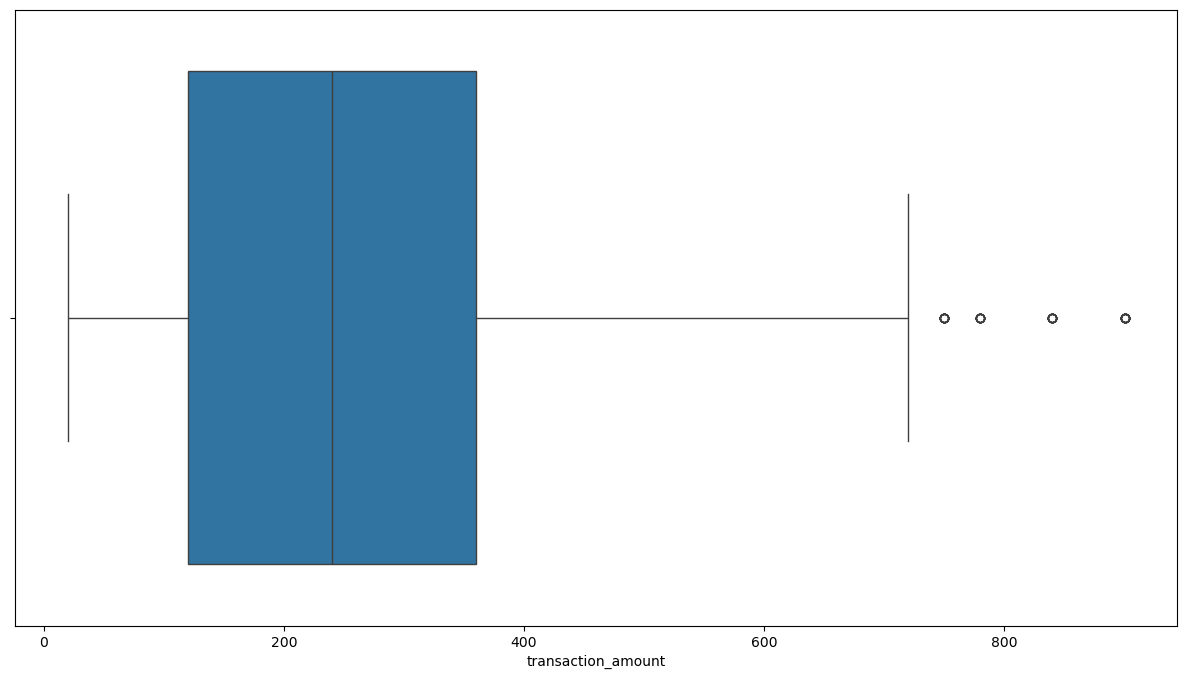

In [41]:
sns.boxplot(x=df['transaction_amount'])
plt.show()

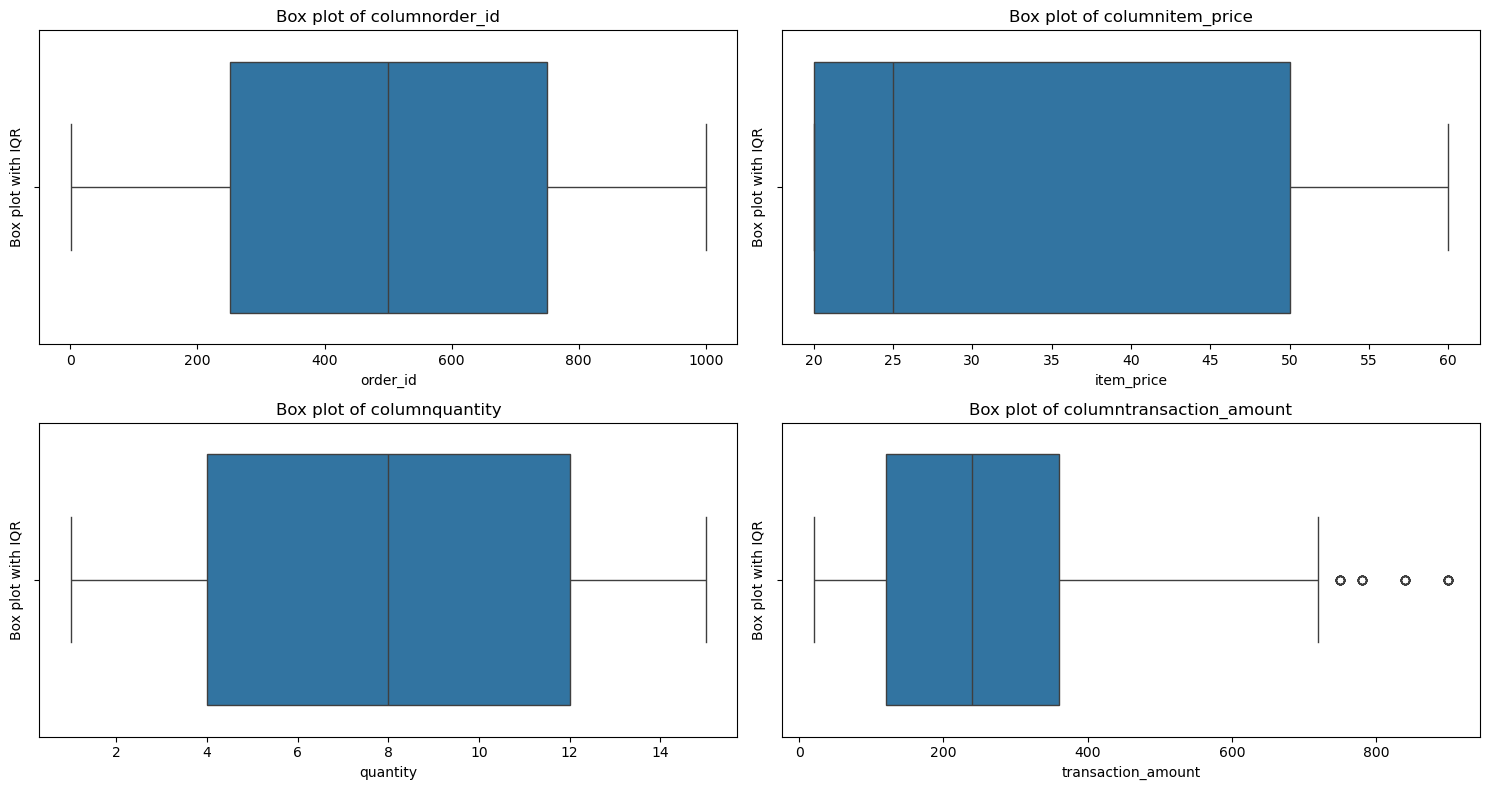

In [42]:
t=1
for i in num:
    plt.subplot(2,2,t)   
    sns.boxplot(x=df[i])   #  x=df[i] giving to get the boxplot in this shape, else another shape(down side)         
    plt.xlabel(i)
    plt.ylabel('Box plot with IQR')
    plt.title(f'Box plot of column{i}')
    t+=1
plt.tight_layout()
plt.show()

Inferences

* There is outliers values in transcation amount
* if there is outliers in quantity it is within the whiskers

### Categorical column

In [43]:
Cat

['date',
 'item_name',
 'item_type',
 'transaction_type',
 'received_by',
 'time_of_sale']

#### using value counts

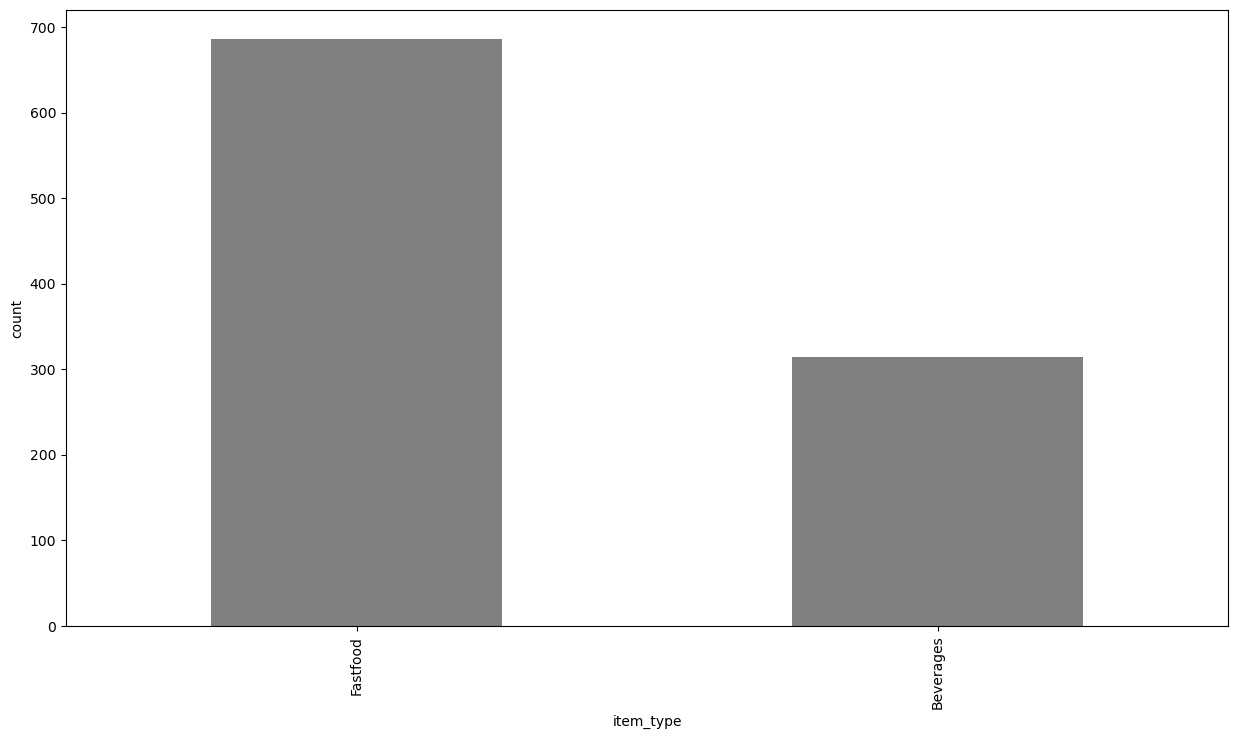

In [44]:
df['item_type'].value_counts().plot(kind='bar',color='grey')
plt.ylabel('count')
plt.show()

#### count plot (using sns)

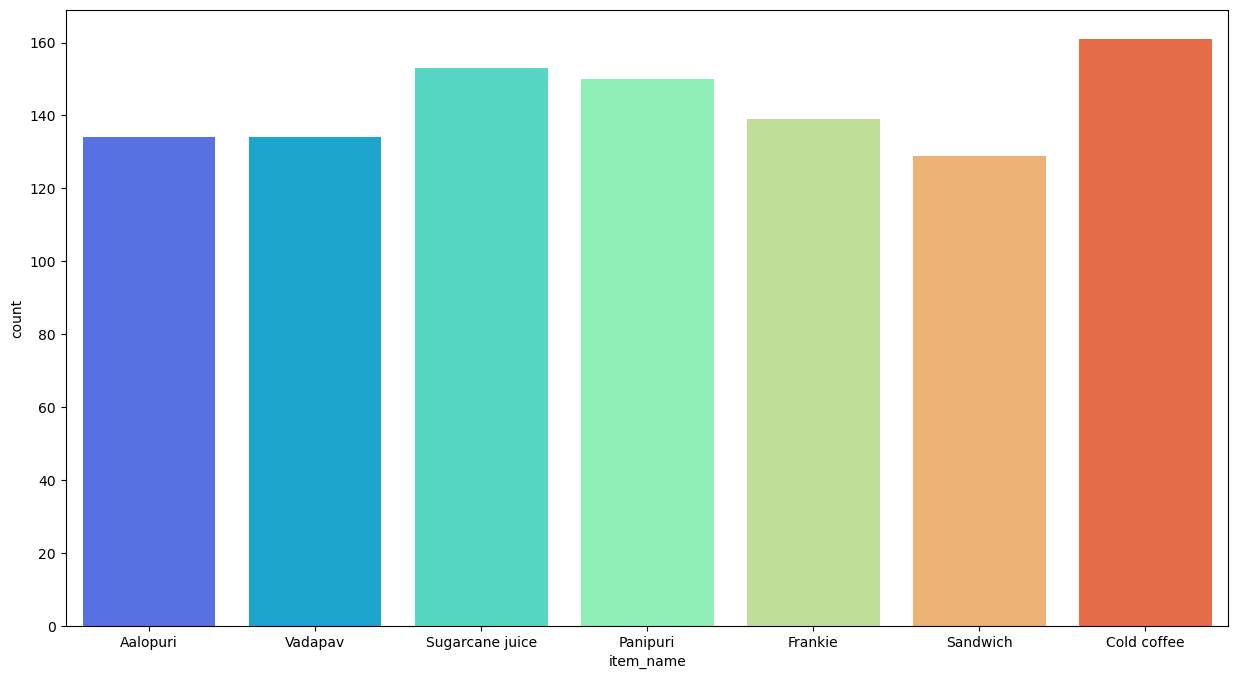

In [45]:
sns.countplot(x=df['item_name'],palette='rainbow')
plt.show()

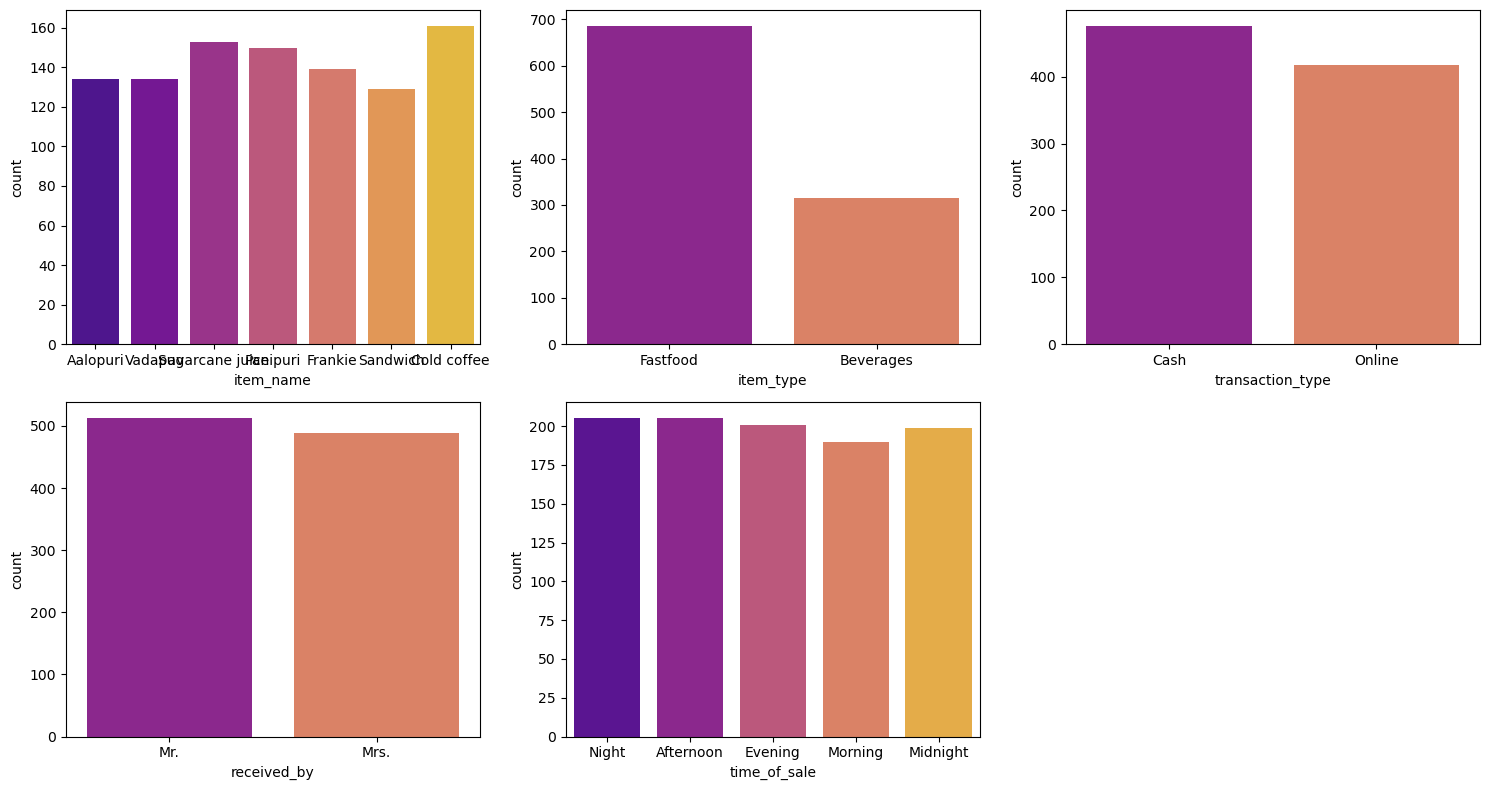

In [46]:
# to create grid

t=1
for i in Cat:
    if i !='date':  # date ignoring because date is not a category
        plt.subplot(2,3,t)
        sns.countplot(x=df[i],palette='plasma')
        t+=1
plt.tight_layout()
plt.show()

#### Pie chart

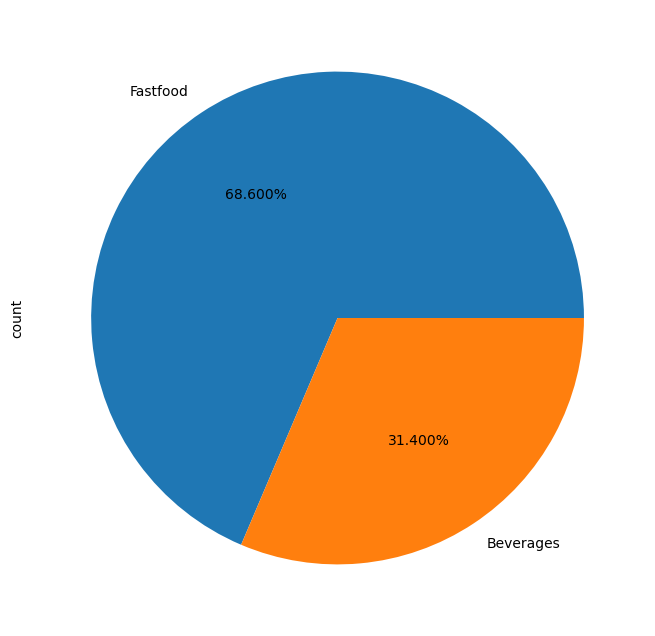

In [47]:
df['item_type'].value_counts().plot(kind='pie', autopct="%.3f%%")   #1&last % wildcard initiating, .number(how many decimals),f for formating 
plt.show()                                                          #and if need % along with number give %

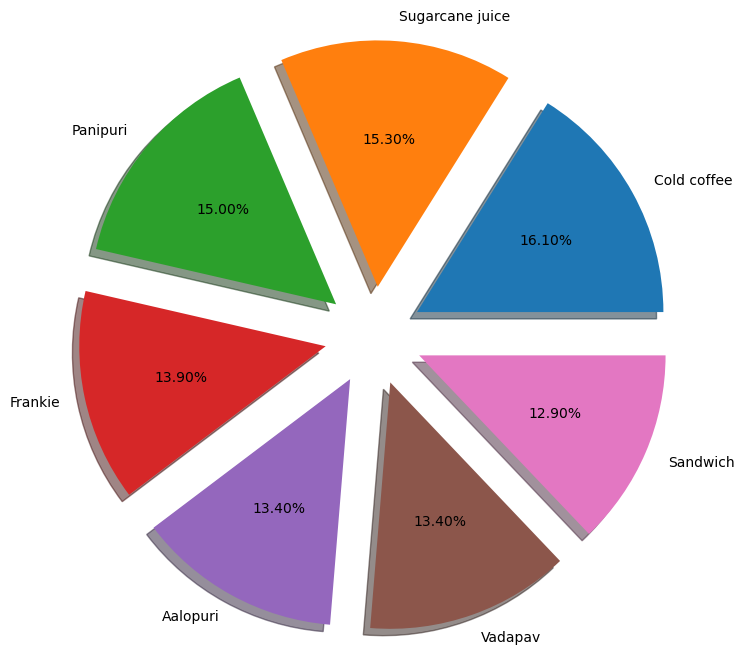

In [48]:
plt.pie(x=df['item_name'].value_counts(),labels=df['item_name'].value_counts().index,autopct="%.2f%%",
        shadow=True,explode=[0.2,0.2,0.2,0.2,0.2,0.2,0.2])   #0.2 is the gap can give from 0.1 to 0.3
plt.show()

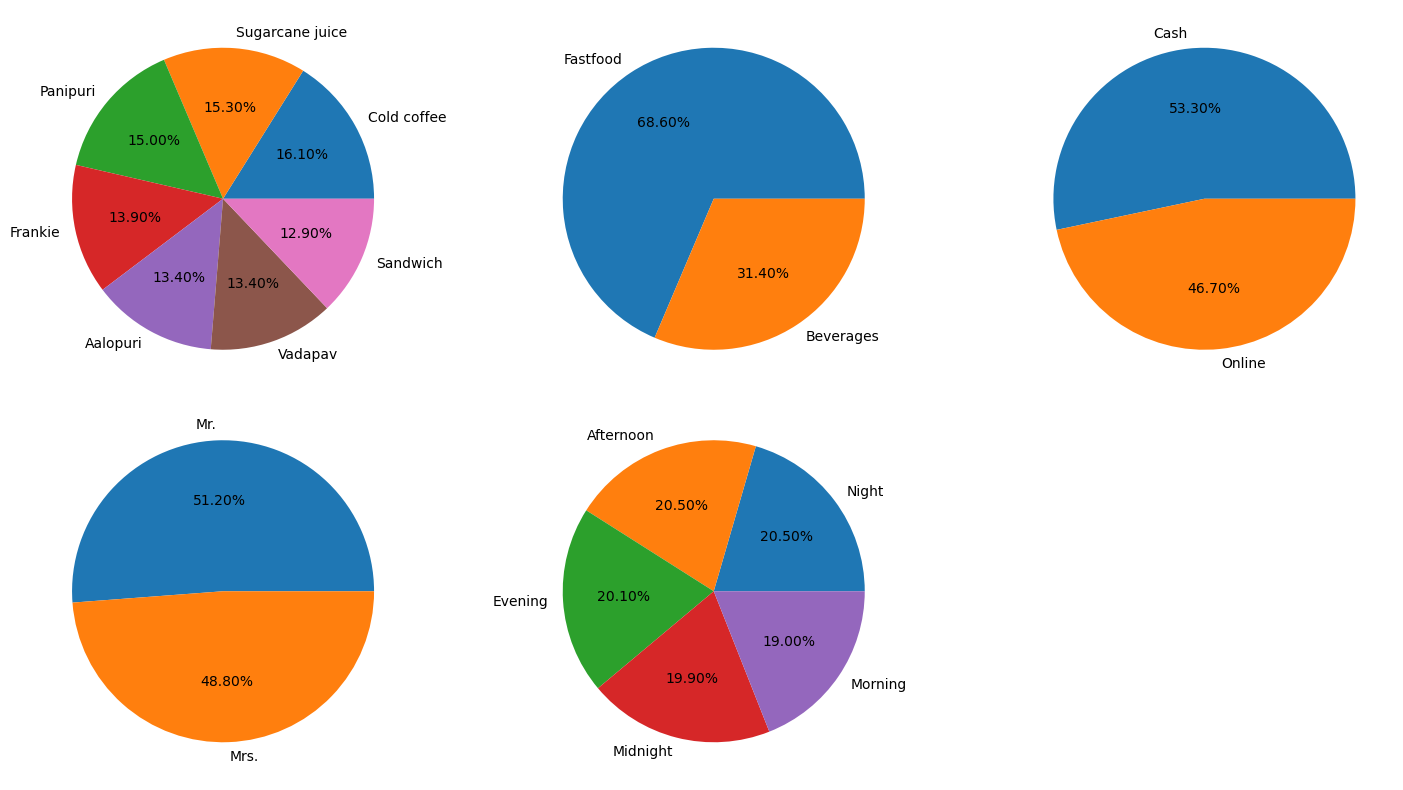

In [49]:
# to create grid

t=1
for i in Cat:
    if i !='date':  # date ignoring because date is not a category
        plt.subplot(2,3,t)
        plt.pie(x=df[i].value_counts(),labels=df[i].value_counts().index,autopct="%.2f%%")
        t+=1
plt.tight_layout()
plt.show()

## 2. Bivariate visualization

#### Num

In [50]:
num

['order_id', 'item_price', 'quantity', 'transaction_amount']

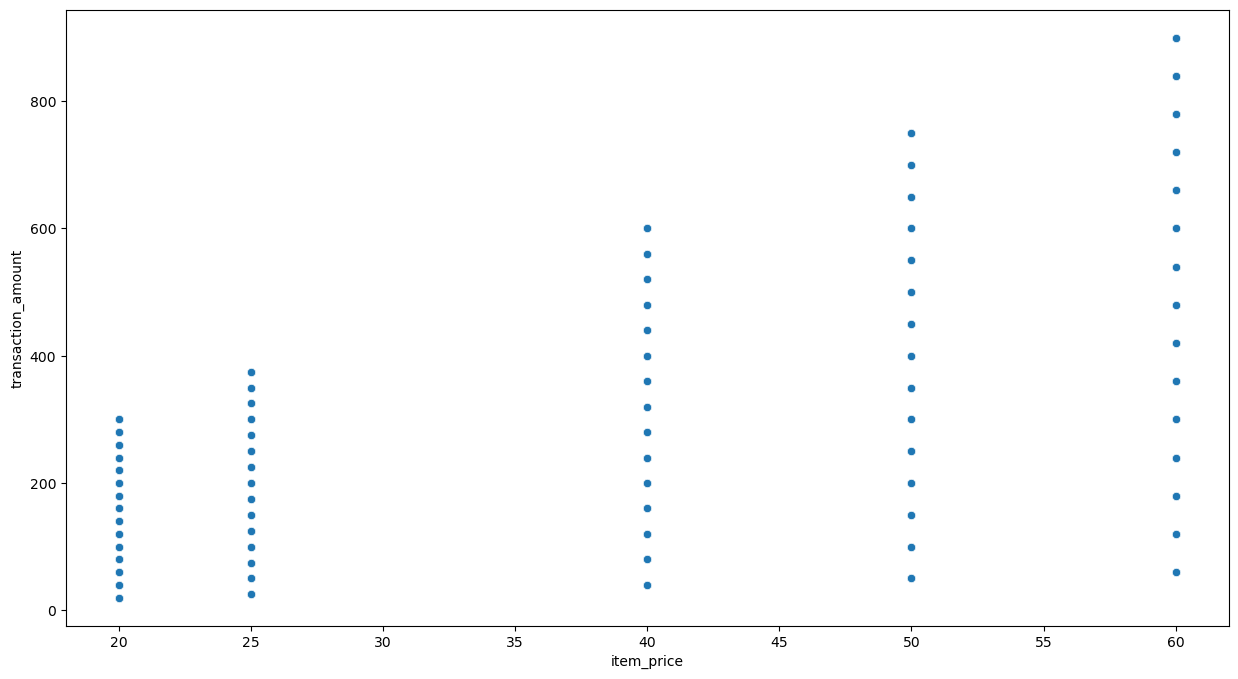

In [51]:
sns.scatterplot(x=df['item_price'],y=df['transaction_amount'])
plt.show()

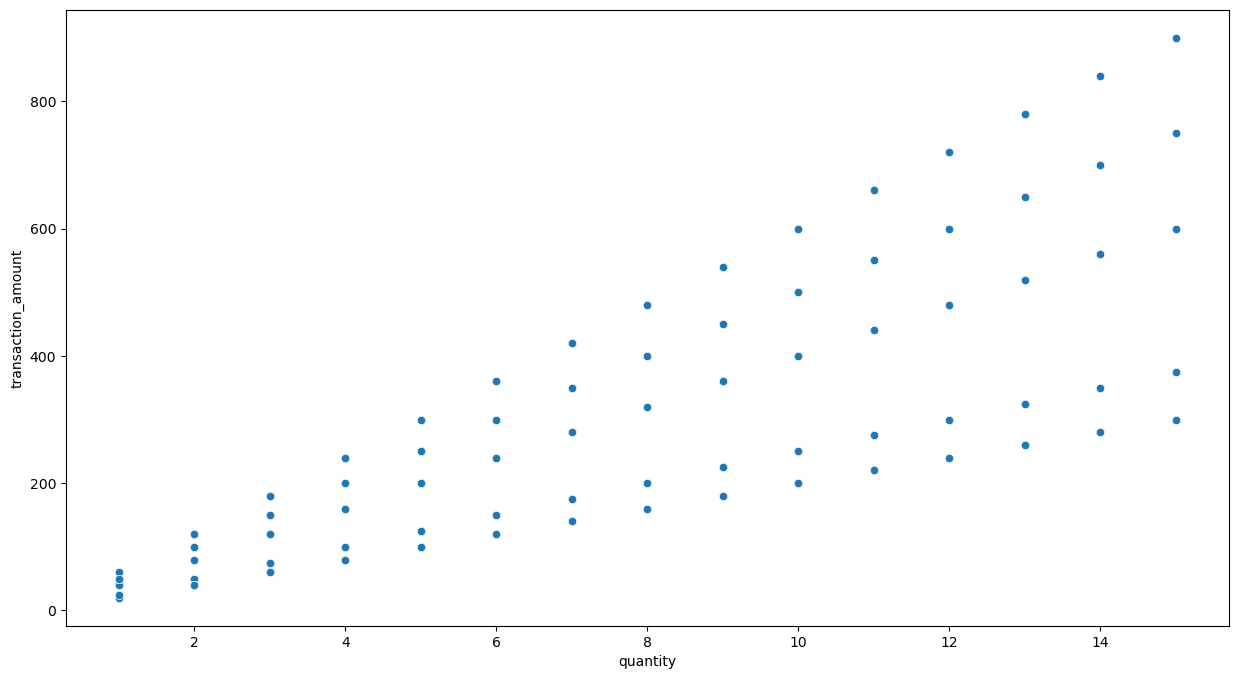

In [52]:
sns.scatterplot(x=df['quantity'],y=df['transaction_amount'])
plt.show()

Inferences
* There is relation between quantity and transaction amount, as when quantity increases transcation amount also increases
  

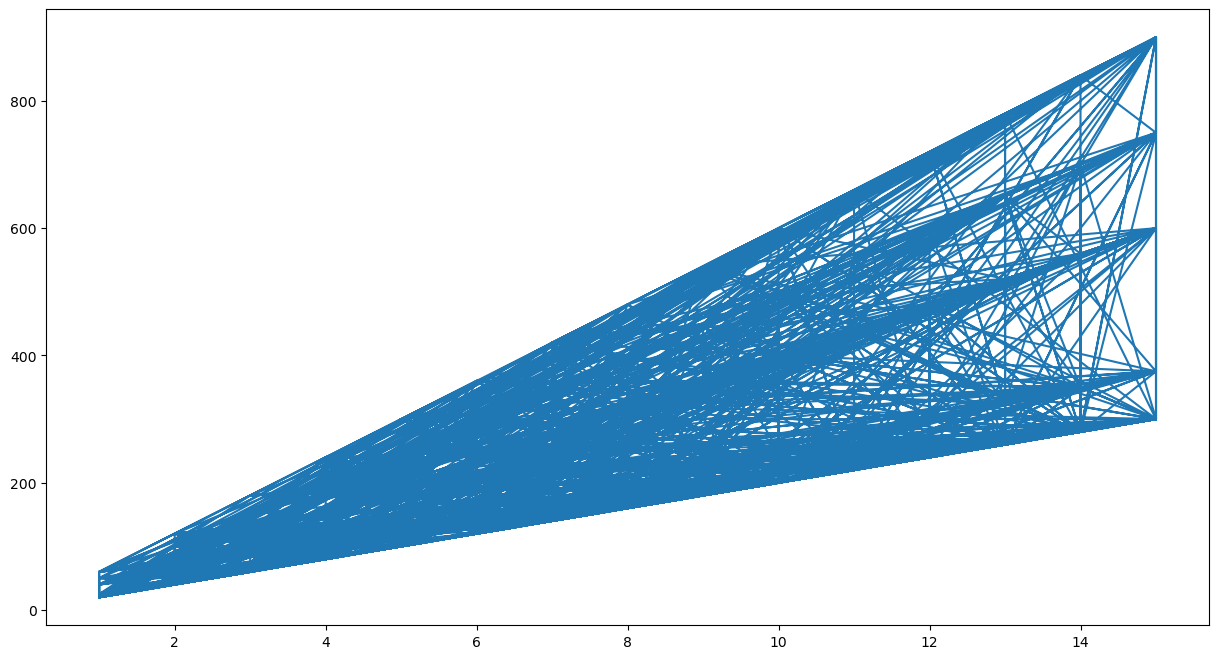

In [53]:
plt.plot(df['quantity'],df['transaction_amount'])
plt.show()

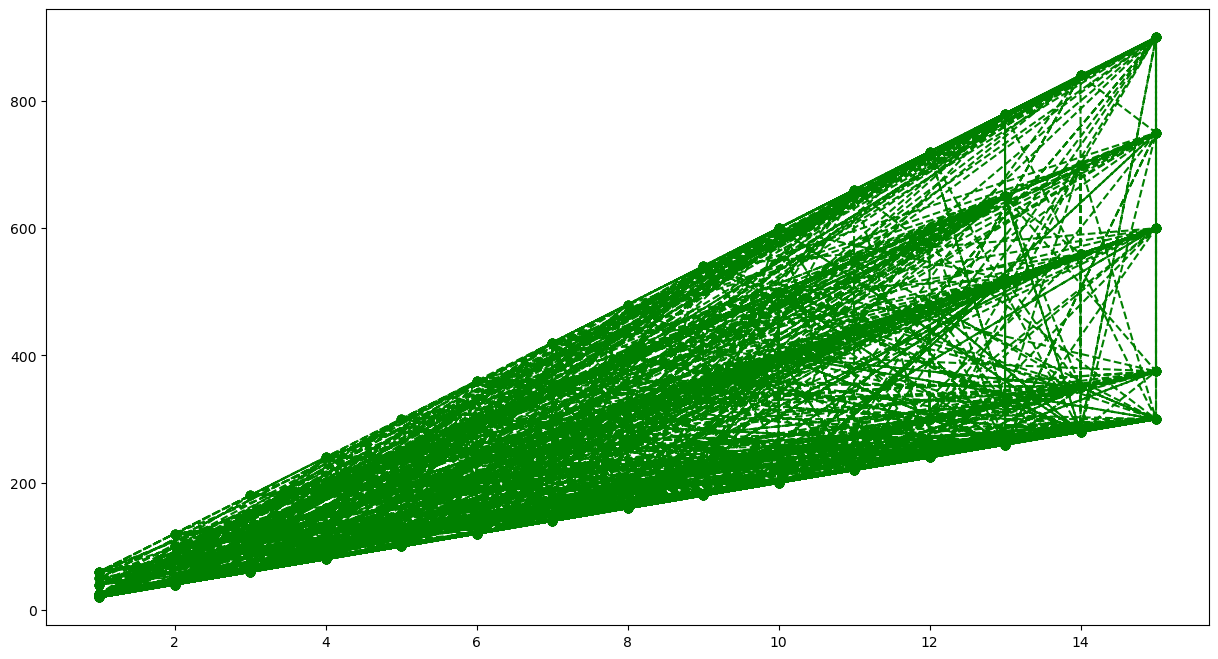

In [54]:
plt.plot(df['quantity'],df['transaction_amount'],'go',linestyle ='--')  # to get this dotted connections in this chart
plt.show()

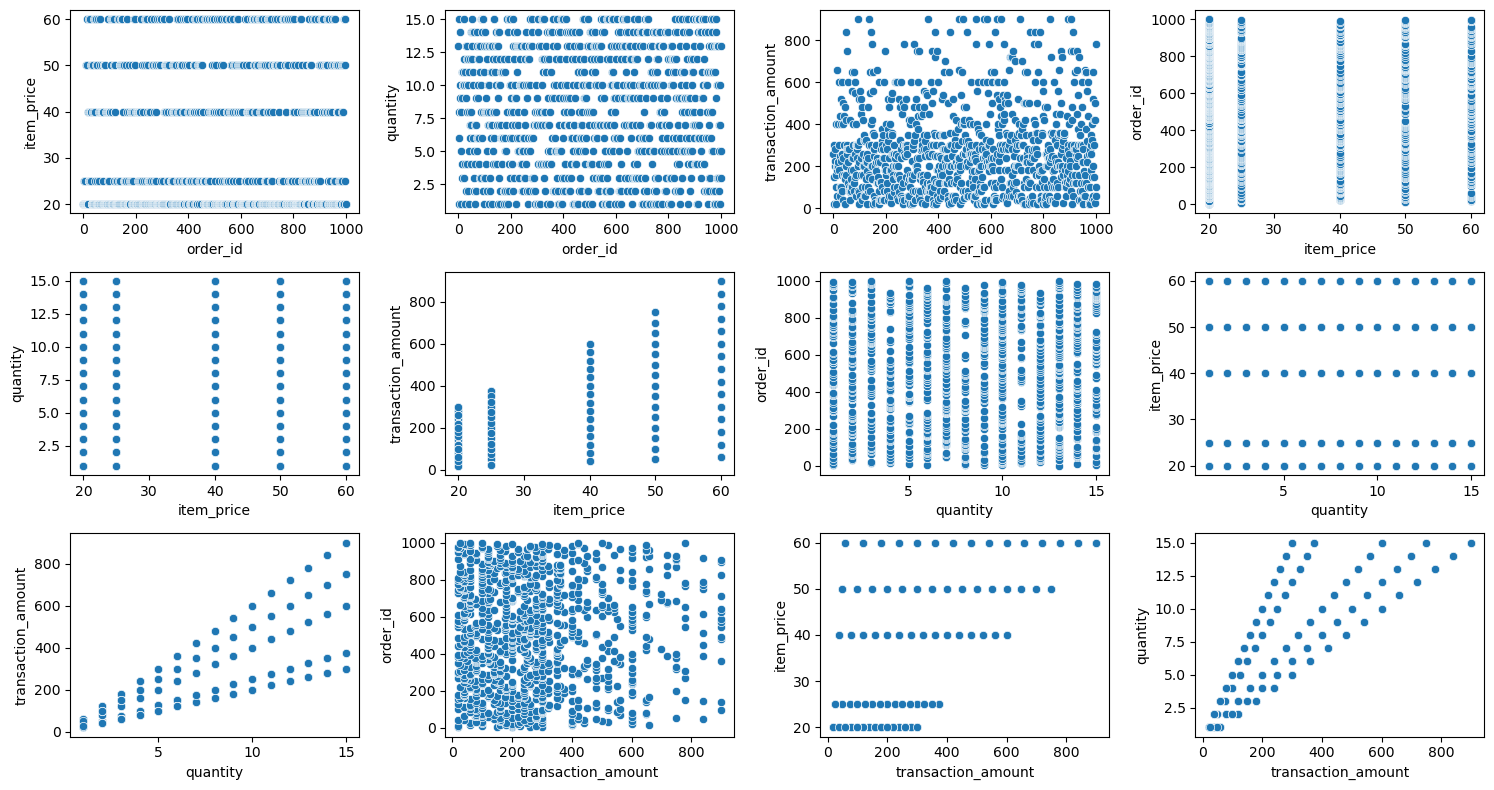

In [55]:
# Grid

t=1
for i in num:
    for j in num:
          if i!=j:
              plt.subplot(3,4,t)
              sns.scatterplot(x=df[i],y=df[j])
              t+=1        
plt.tight_layout()
plt.show()

Inferences
* when quantity increses transcation amount also increses


## Num v/s Cat

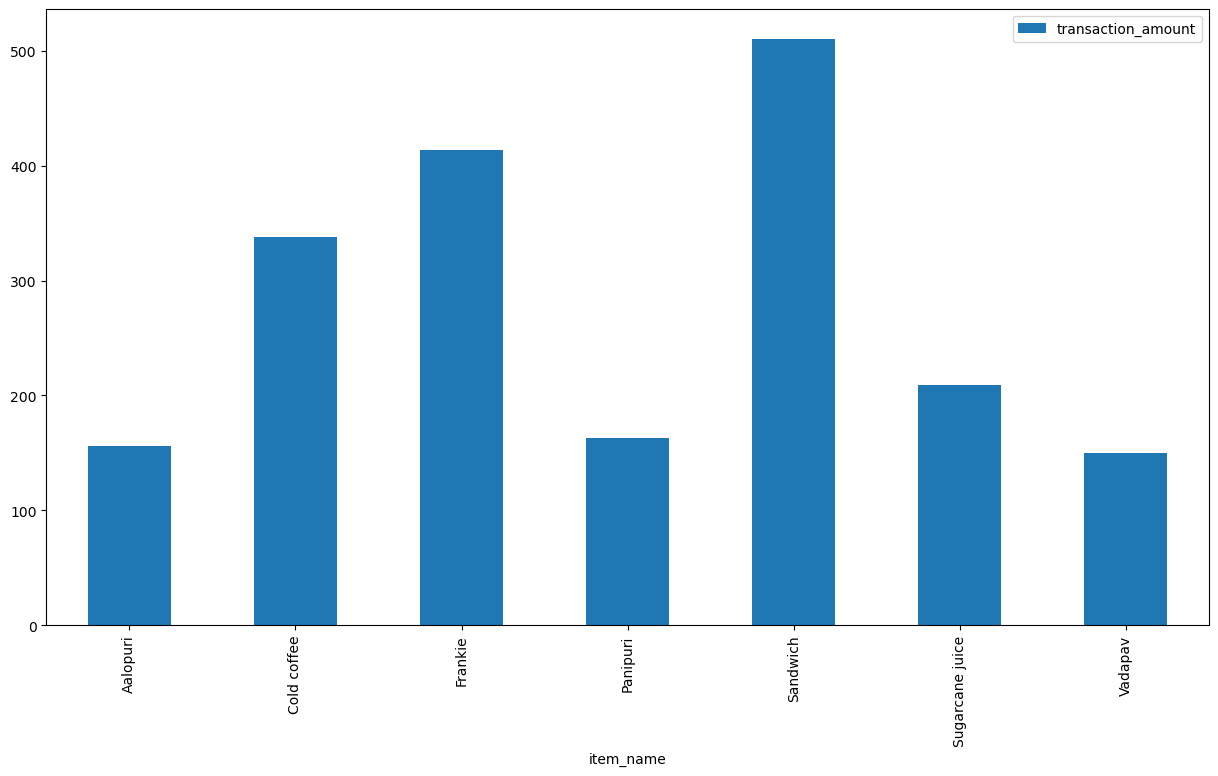

In [56]:
df.groupby(by='item_name')[['transaction_amount']].mean().plot(kind='bar')
plt.show()

Inferences
* average transcation amount of sanwitch is more in this data
* for vadapavu transcation amount is least here

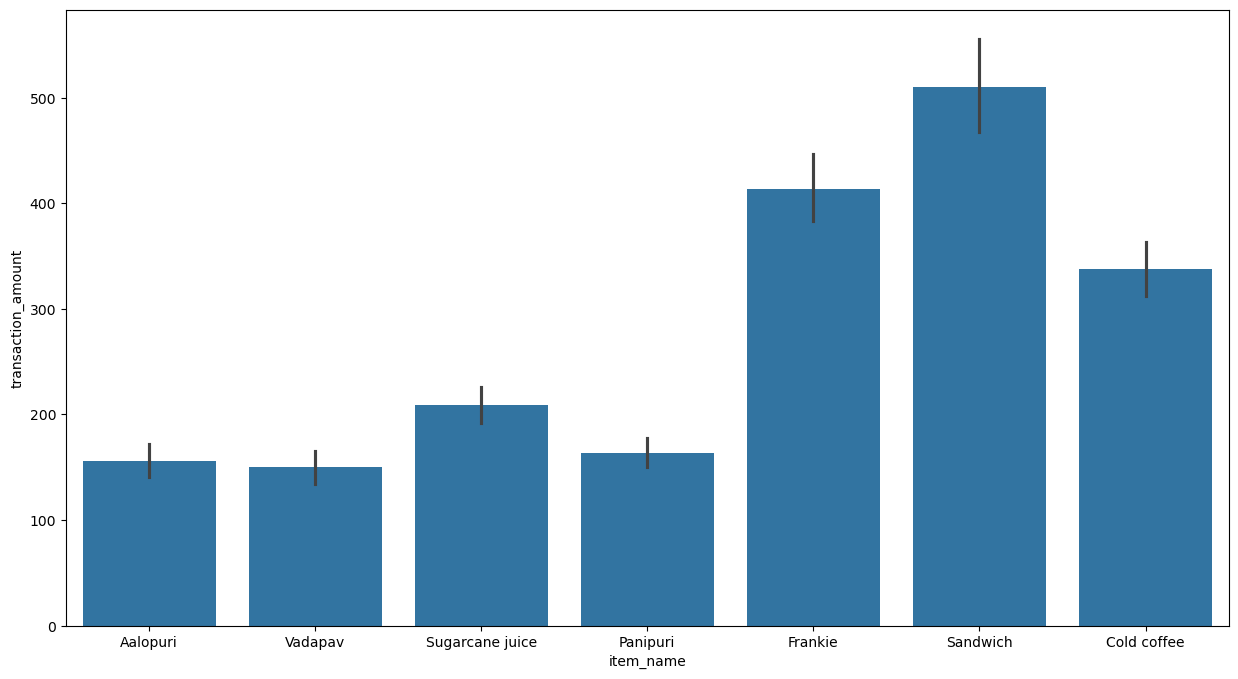

In [57]:
sns.barplot(x=df['item_name'],y=df['transaction_amount'])
plt.show()

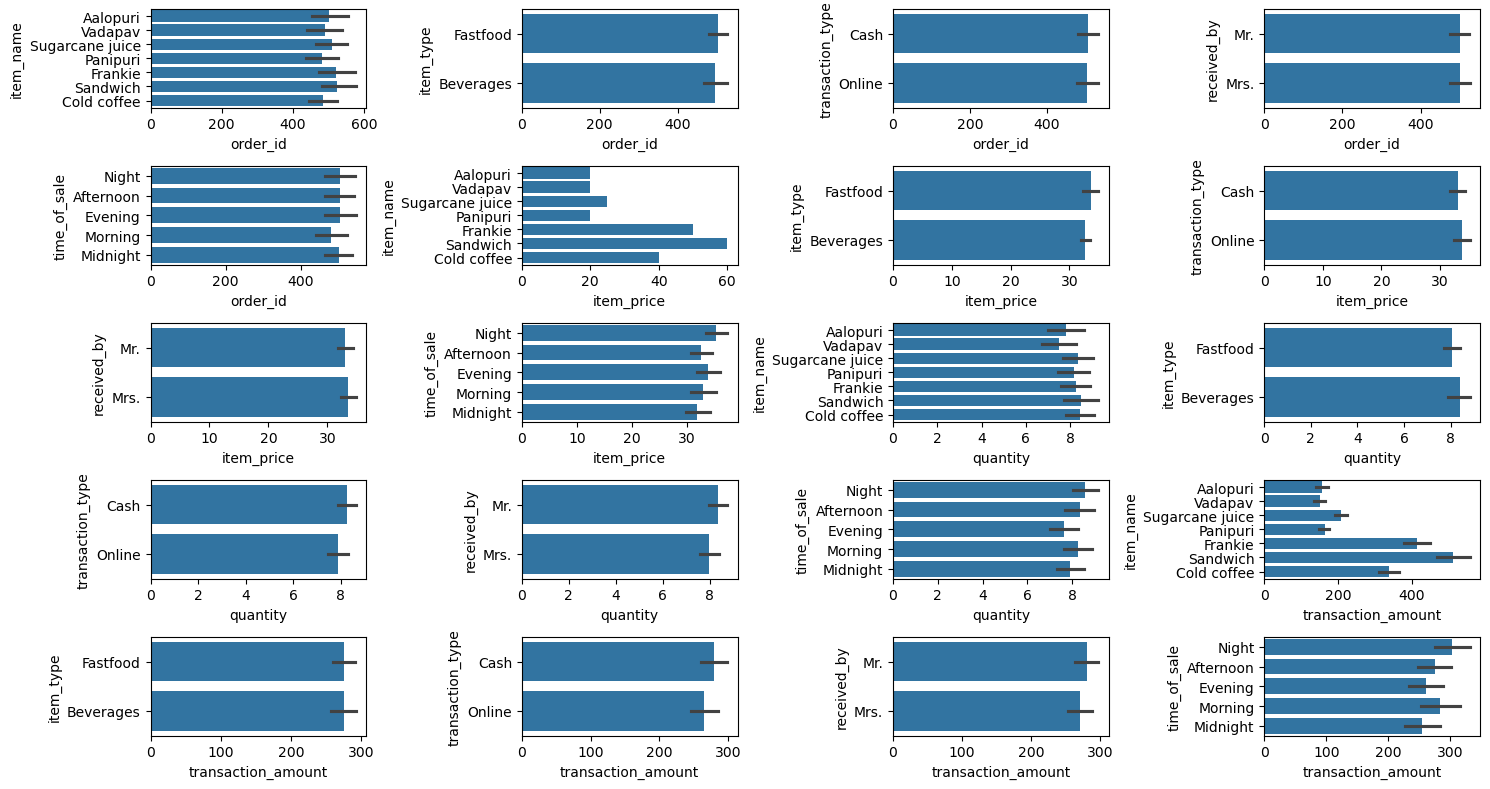

In [58]:
# Grid

t=1
for i in num:
    for j in Cat:
        if j!='date':
            plt.subplot(5,4,t)
            sns.barplot(x=df[i],y=df[j])
            t+=1
plt.tight_layout()
plt.show()
          

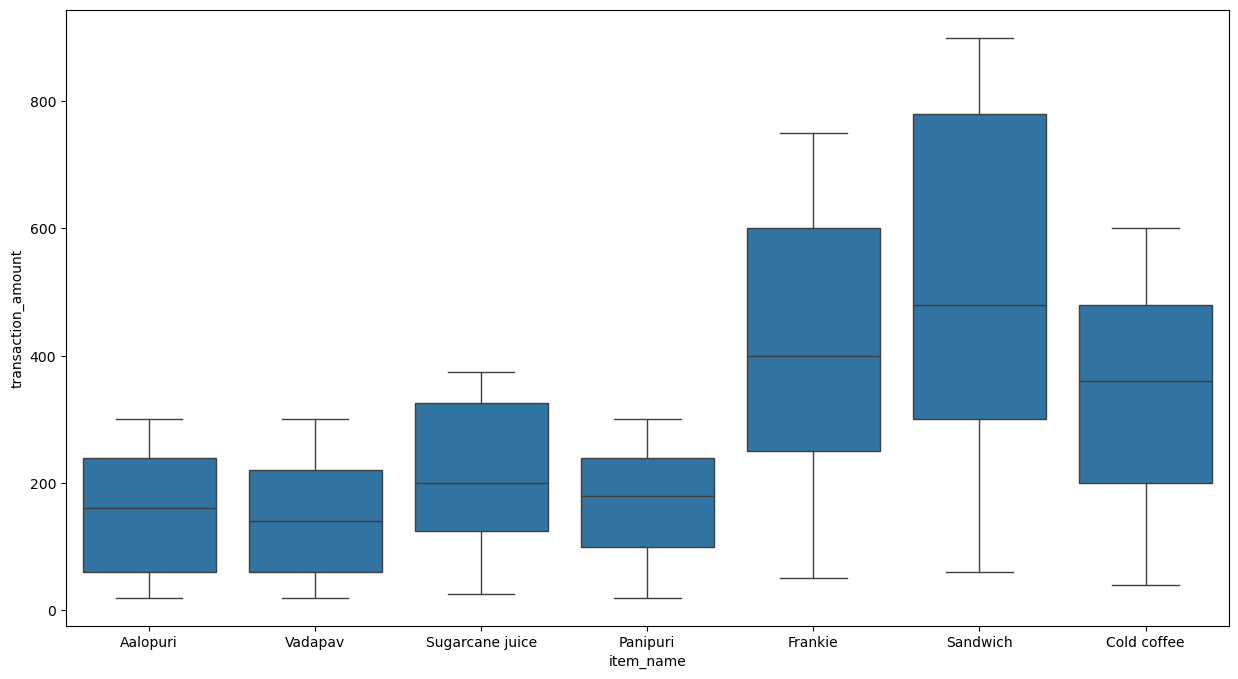

In [59]:
sns.boxplot(x=df['item_name'],y=df['transaction_amount'])
plt.show()

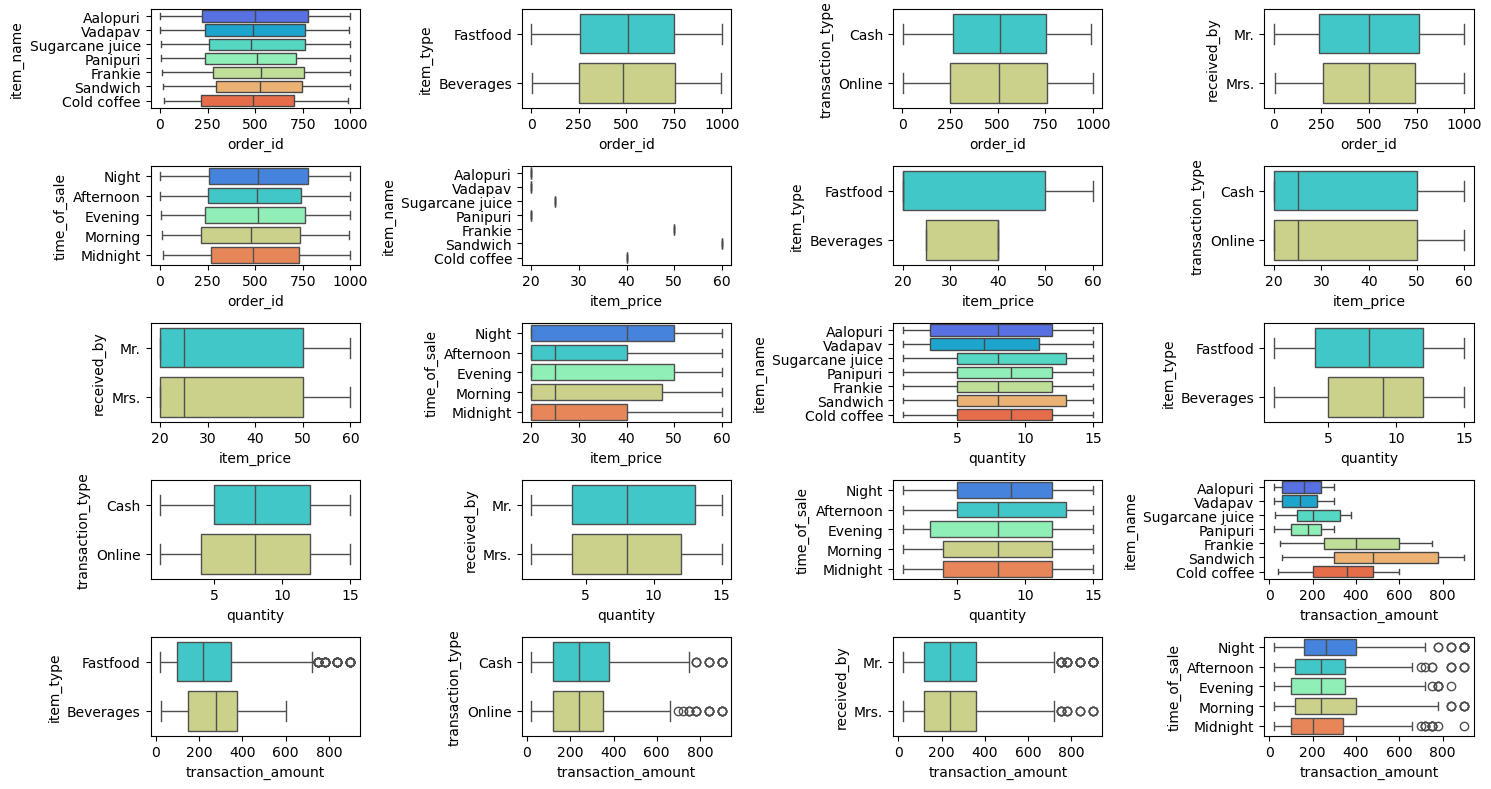

In [60]:
# Grid

t=1
for i in num:
    for j in Cat:
        if j!='date':
            plt.subplot(5,4,t)
            sns.boxplot(x=df[i],y=df[j],palette='rainbow')
            t+=1
plt.tight_layout()
plt.show()
          

## Cat v/s cat

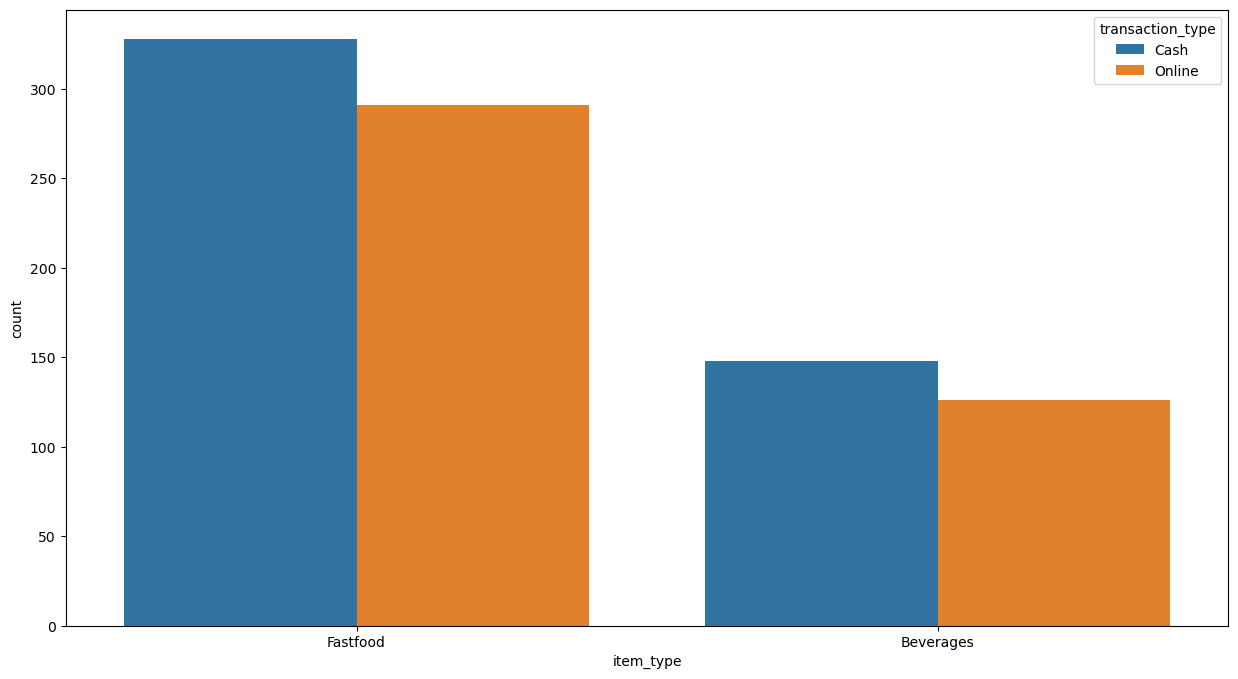

In [61]:
sns.countplot(x=df['item_type'],hue=df['transaction_type'])
plt.show()

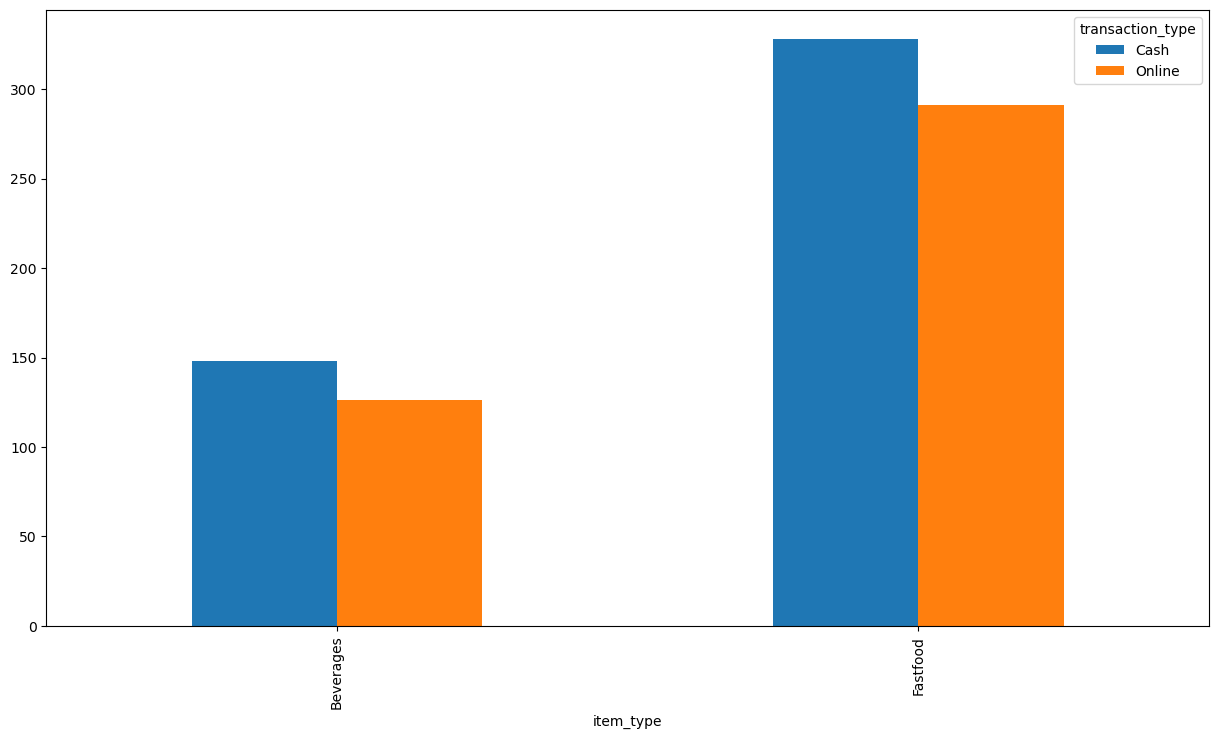

In [62]:
pd.crosstab(df['item_type'],df['transaction_type']).plot(kind='bar')
plt.show()

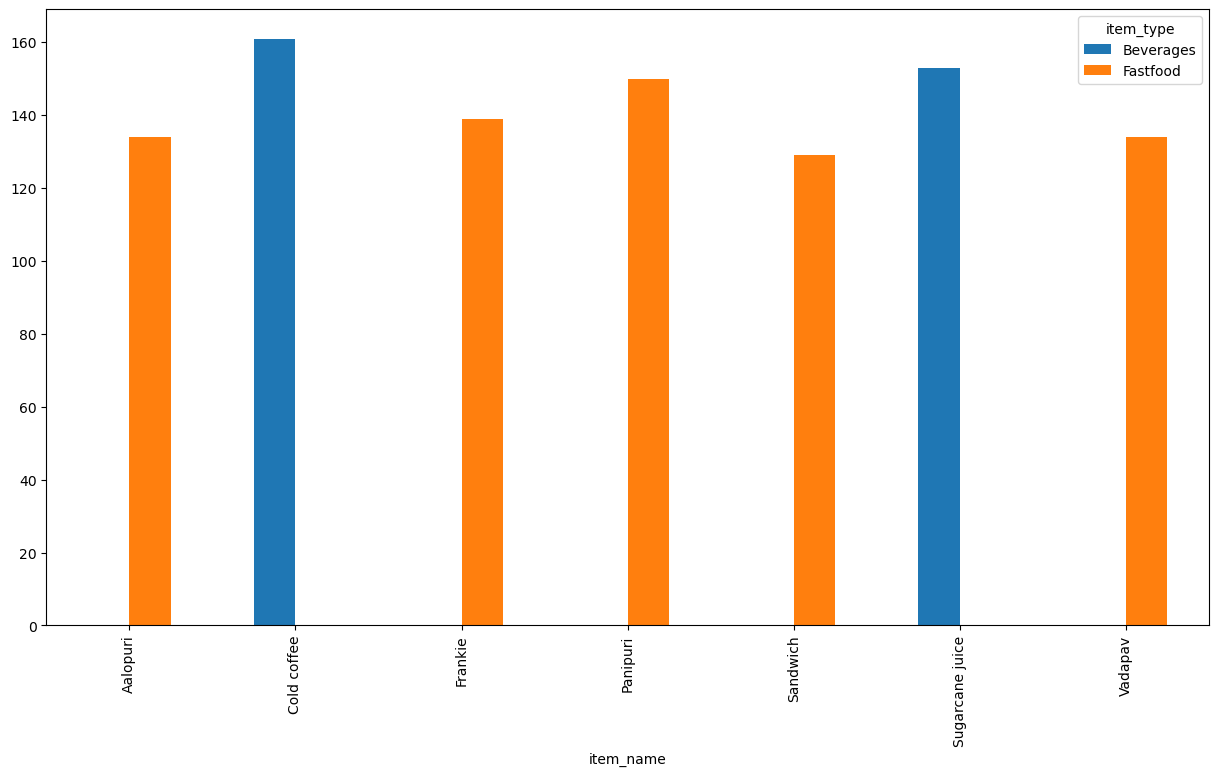

In [63]:
pd.crosstab(df['item_name'],df['item_type']).plot(kind='bar')
plt.show()

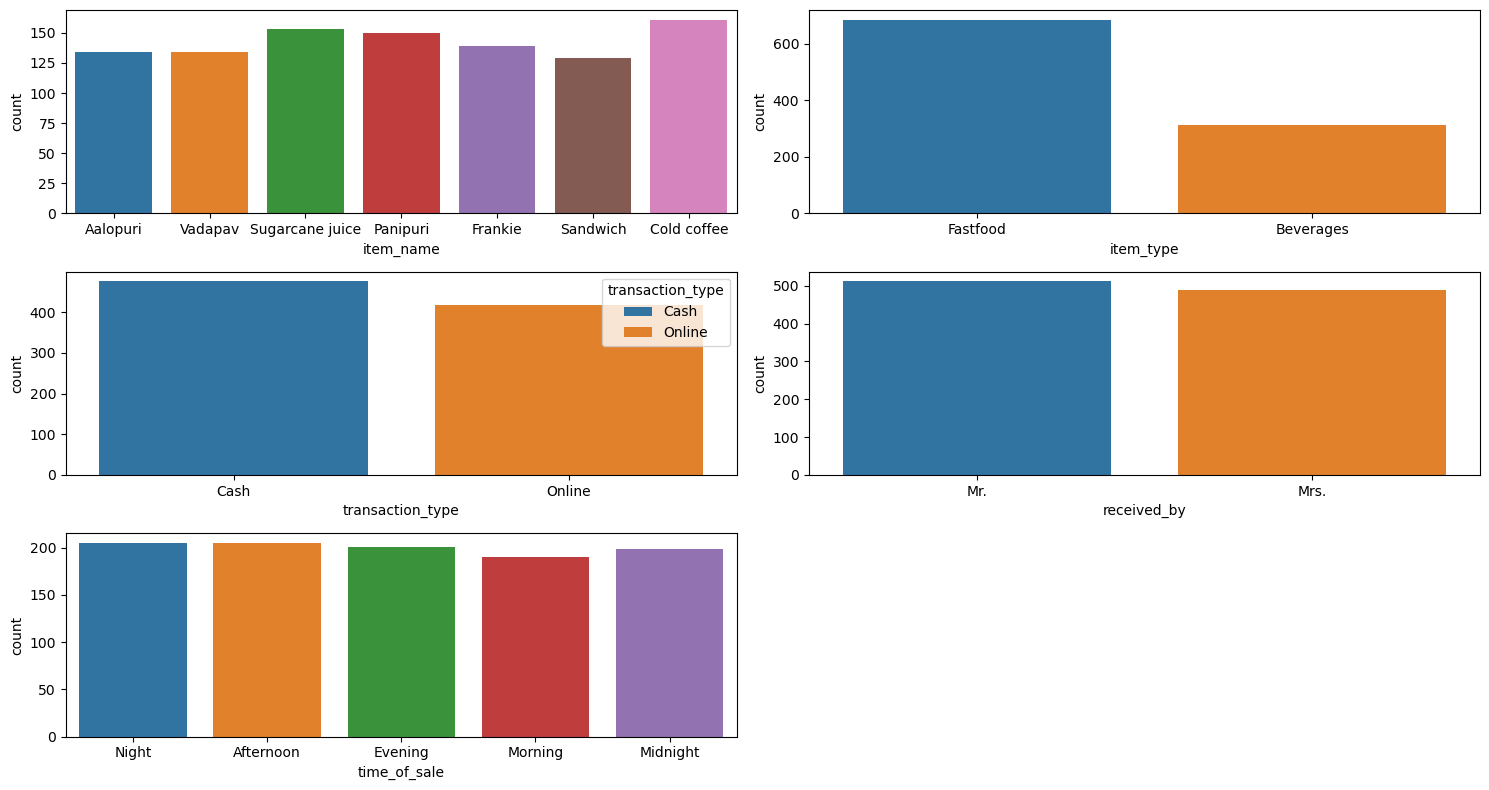

In [64]:
t=1
for i in Cat:
    if i!='date':
        plt.subplot(3,2,t)
        sns.countplot(x=df[i],hue=df[i])
        t+=1
plt.tight_layout()
plt.show()
          
        
        

## Multi variate

## num vs num vs cat

In [65]:
# to find the trend of 2 numerical variable with respect of 1 category

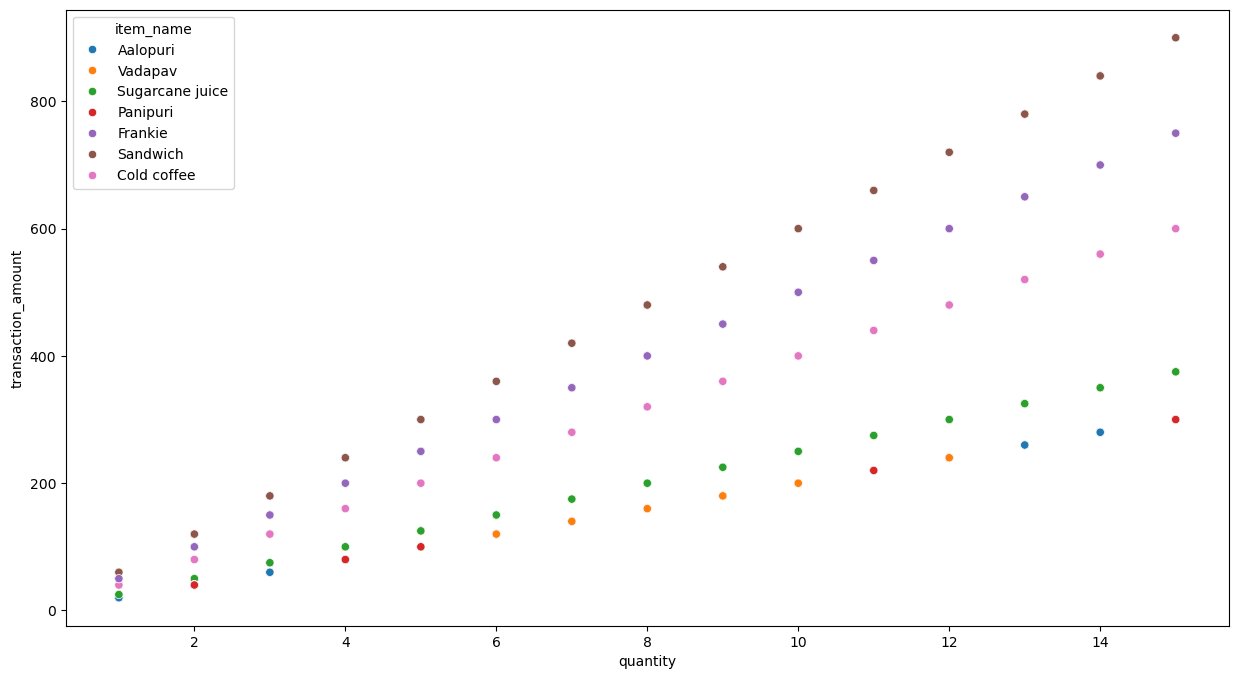

In [66]:
sns.scatterplot(x=df['quantity'],y=df['transaction_amount'],hue=df['item_name'])
plt.show()
                

## num vs cat vs cat

#### box plot

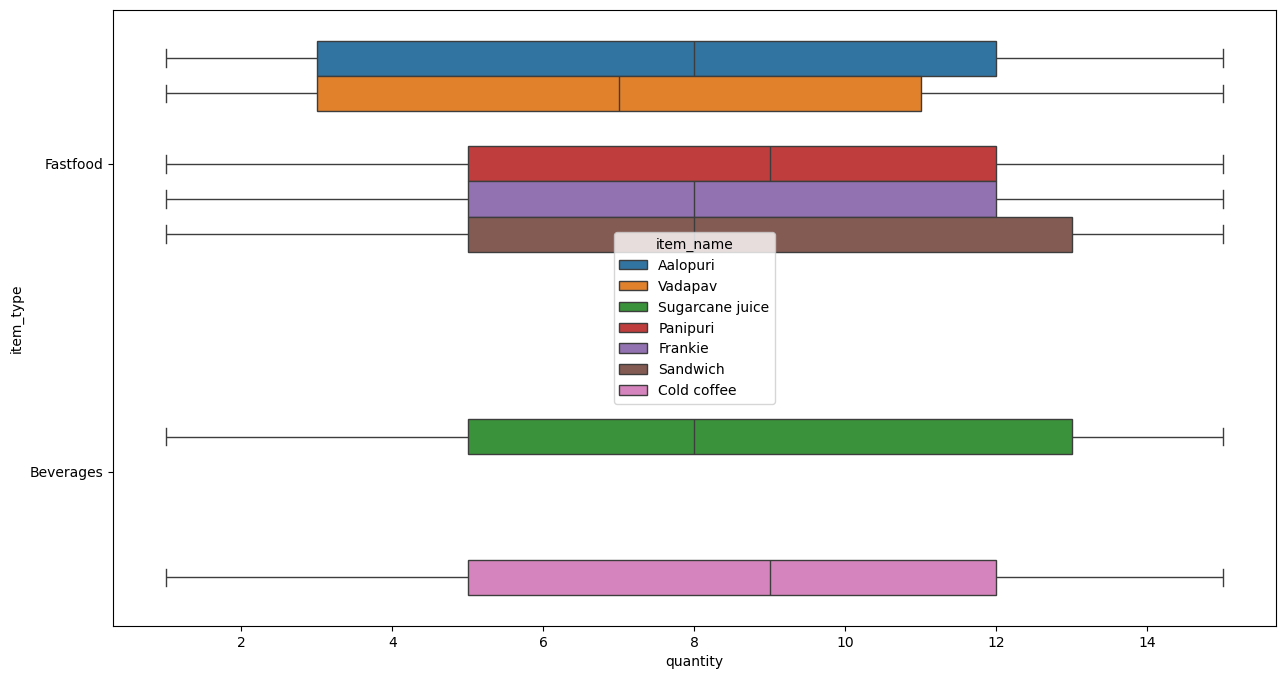

In [67]:
sns.boxplot(x=df['quantity'],y=df['item_type'],hue=df['item_name'])
plt.show()

#### bar plot

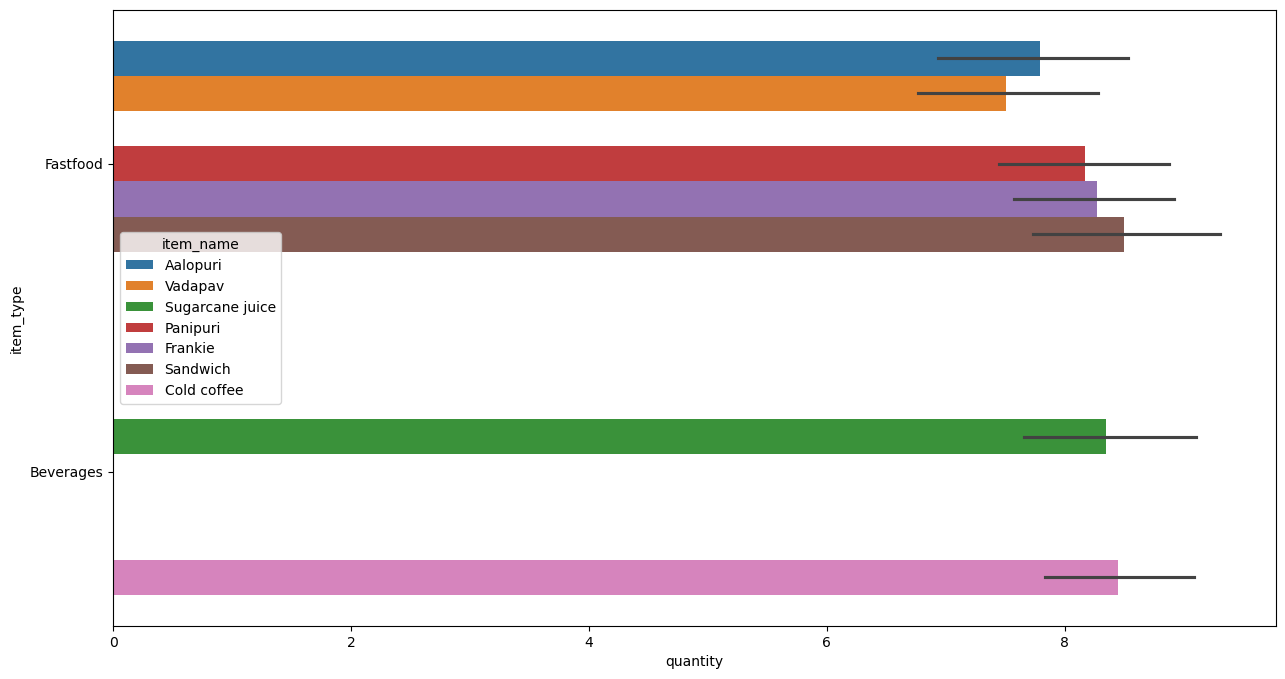

In [68]:
sns.barplot(x=df['quantity'],y=df['item_type'],hue=df['item_name'])
plt.show()

#### Heat map

In [69]:
df[num].corr()

,order_id,item_price,quantity,transaction_amount
order_id,1.000000,0.037028,0.010345,0.043970
item_price,0.037028,1.000000,0.050361,0.637238
quantity,0.010345,0.050361,1.000000,0.731806
transaction_amount,0.043970,0.637238,0.731806,1.000000


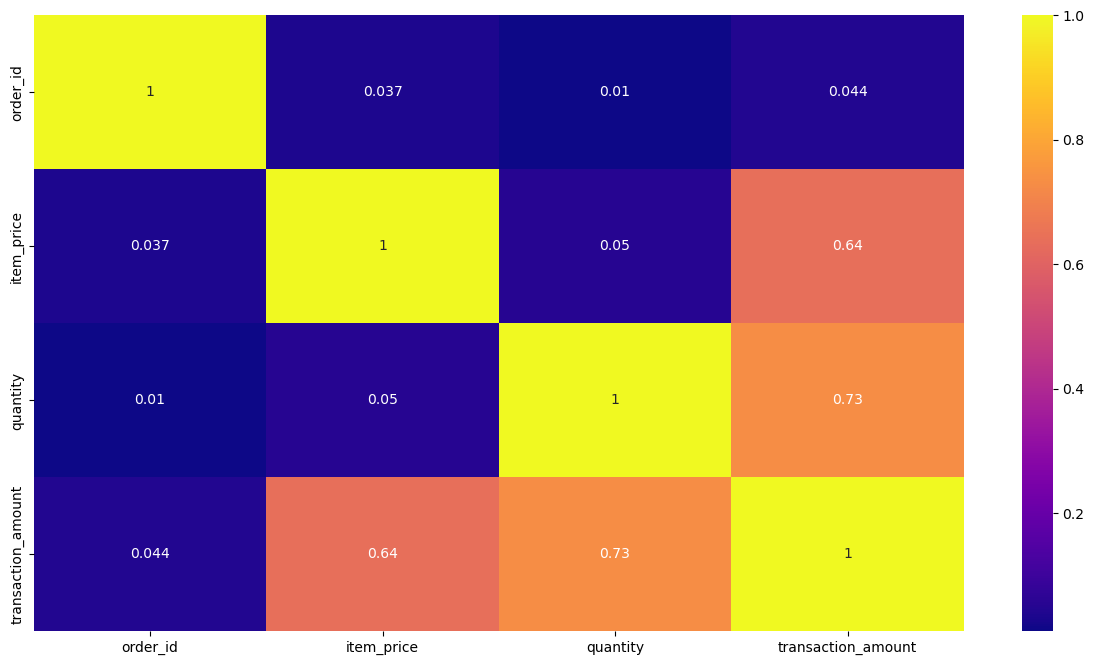

In [70]:
sns.heatmap(df[num].corr(),annot=True,cmap='plasma')
plt.show()

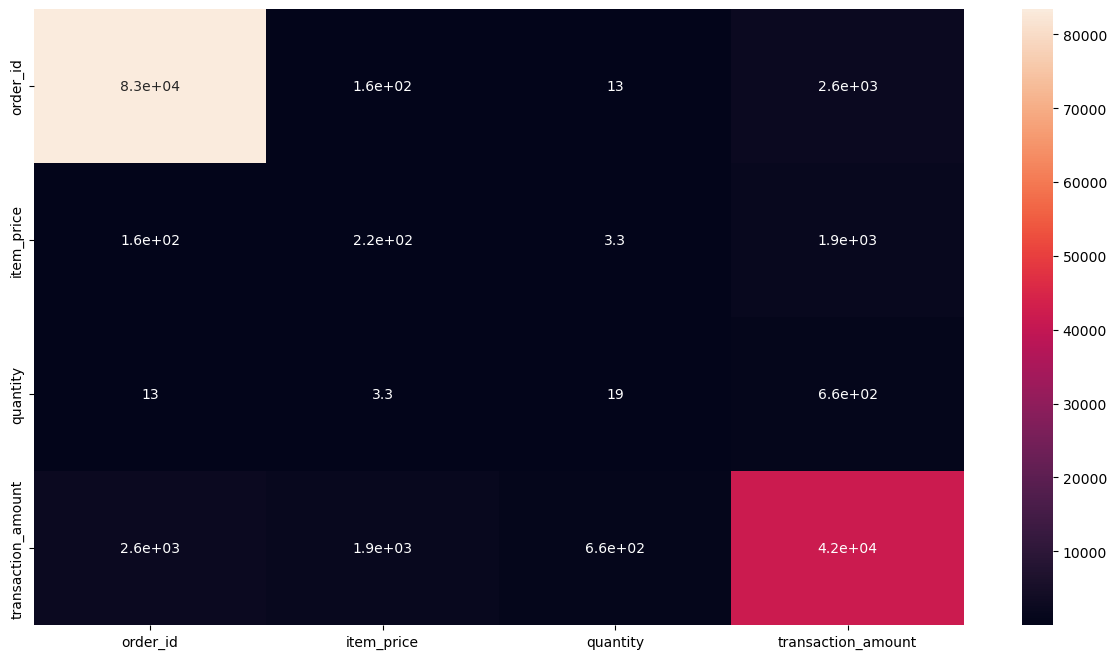

In [71]:
sns.heatmap(df[num].cov(),annot=True)
plt.show()

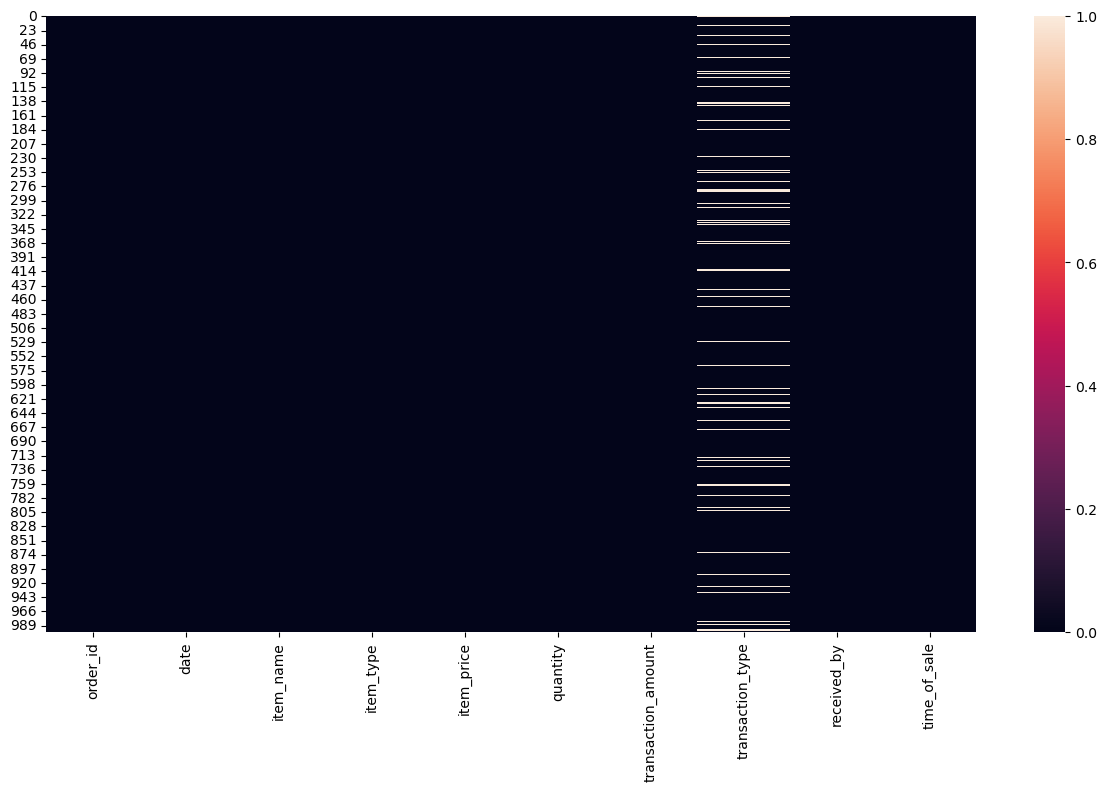

In [72]:
# to get null values
sns.heatmap(df.isnull())
plt.show()

### pairplot

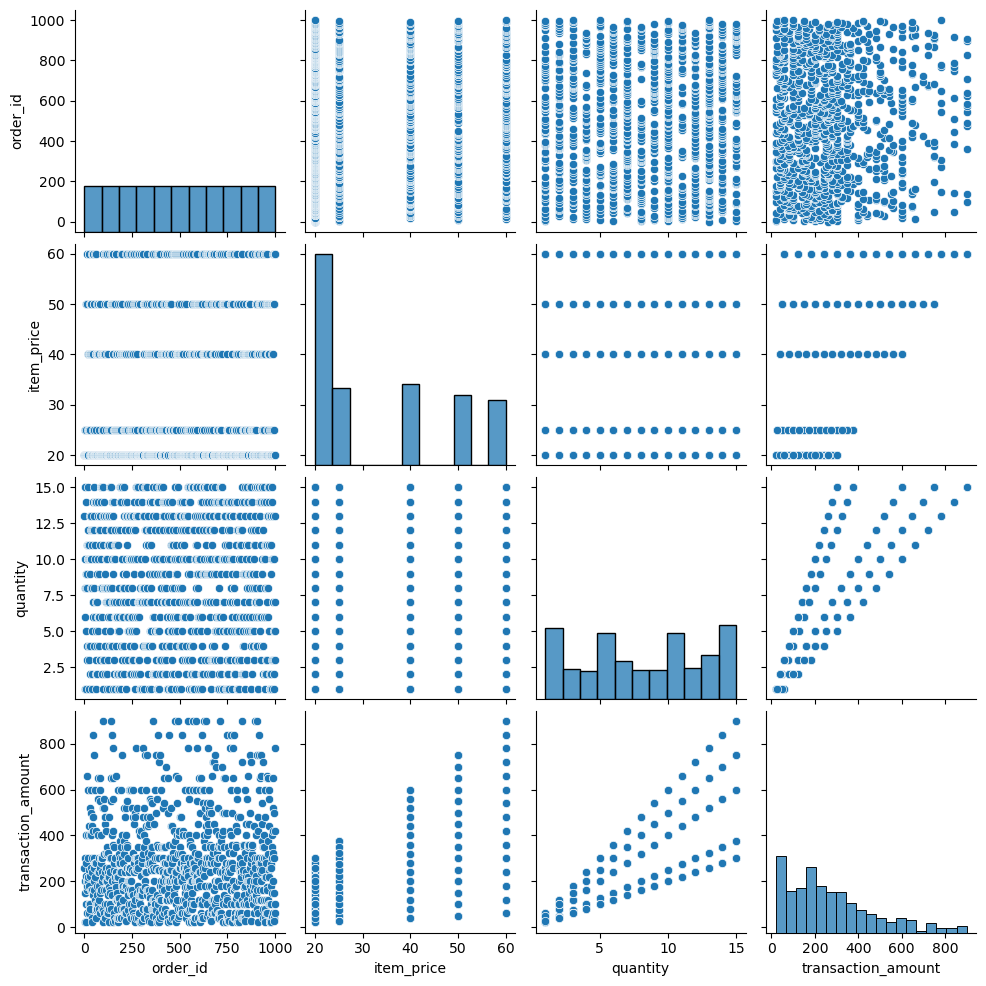

In [73]:
sns.pairplot(df)
plt.show()

### violin plot 

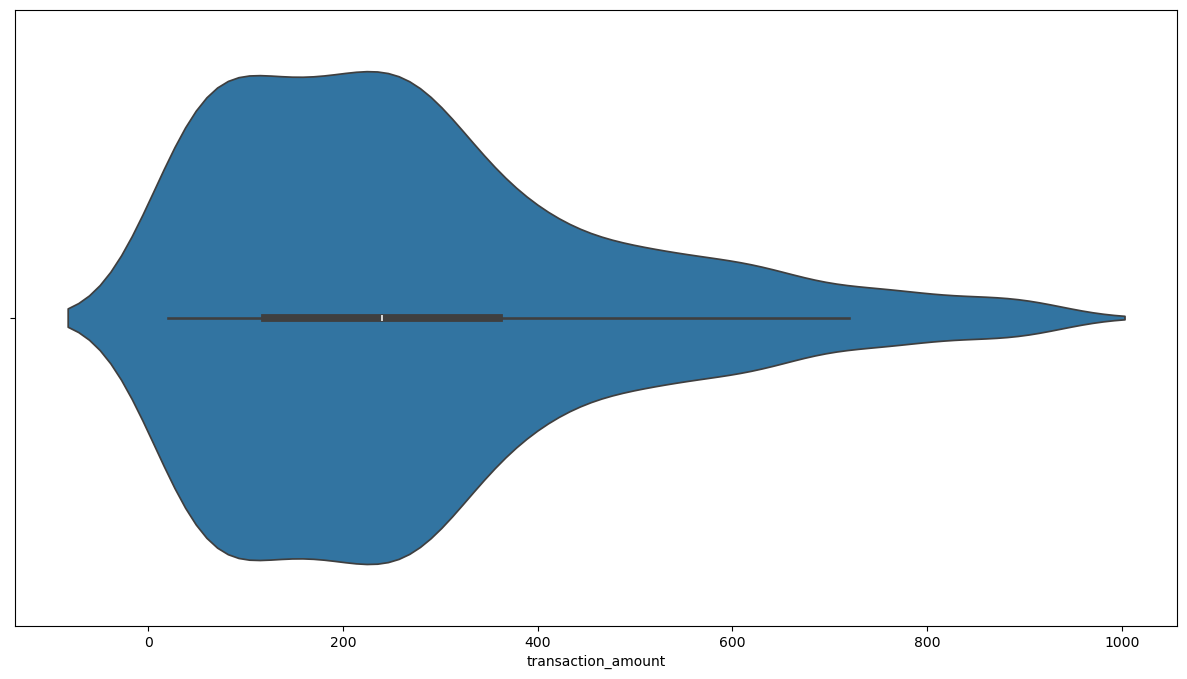

In [74]:
sns.violinplot(x=df['transaction_amount'])
plt.show()

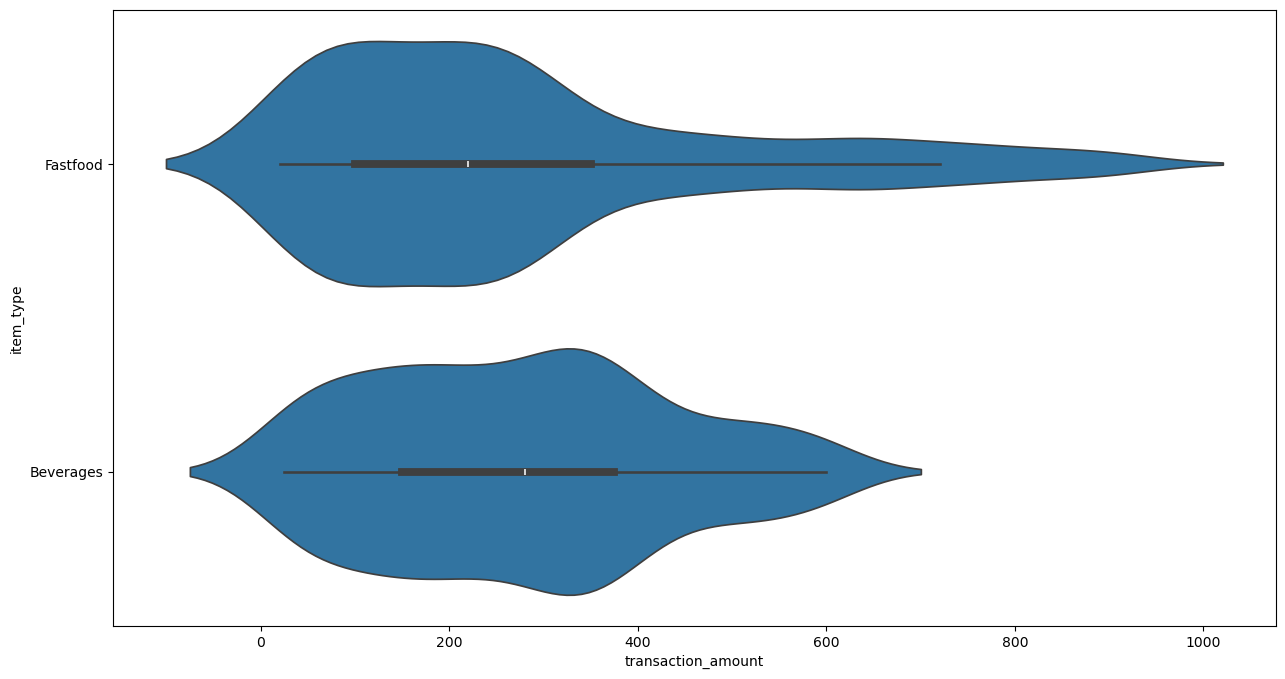

In [75]:
sns.violinplot(x=df['transaction_amount'],y=df['item_type'])
plt.show()


### swarmplot

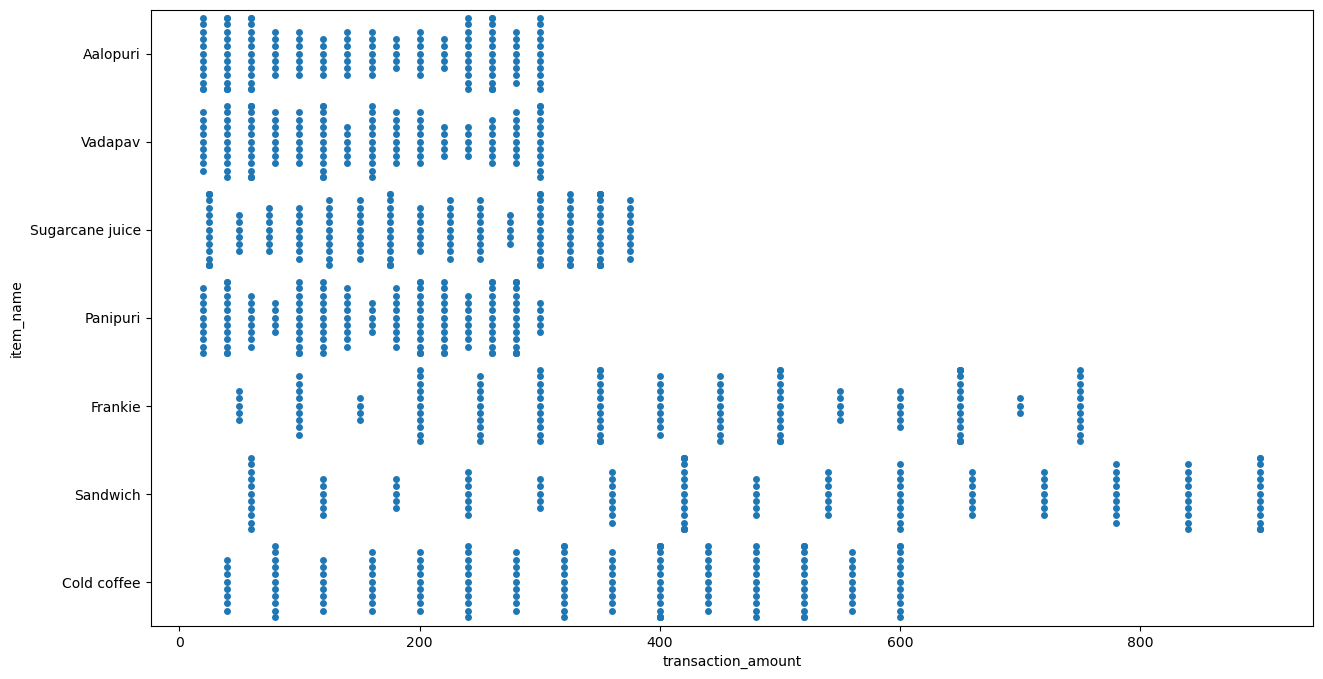

In [76]:
sns.swarmplot(x=df['transaction_amount'],y=df['item_name'])
plt.show()

### line plot (for 2 numerical variables)

In [77]:
x=np.linspace(1,20,100)
y=np.exp(x)

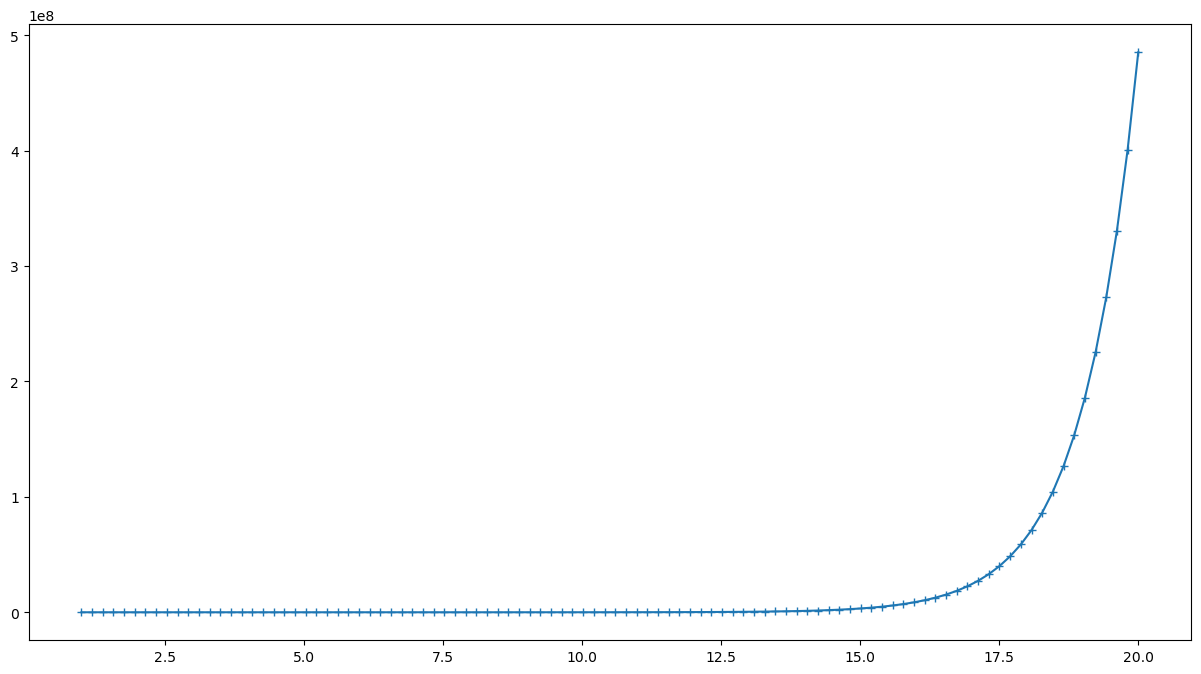

In [78]:
plt.plot(x,y,marker='+')
plt.show()

### Regression plot

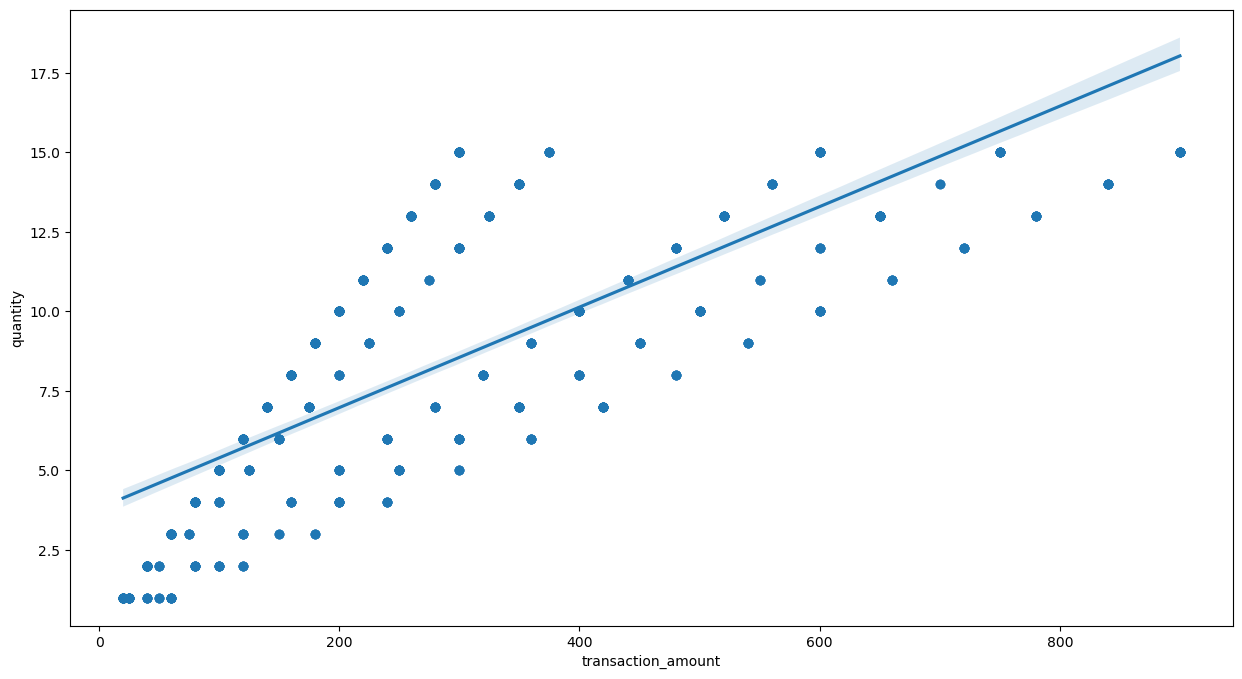

In [79]:
sns.regplot(x=df['transaction_amount'],y=df['quantity'])
plt.show()